# Global Power Plant Database Project

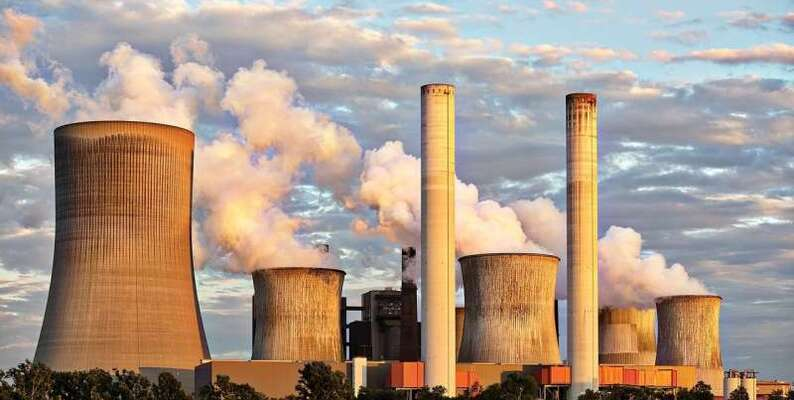

# Project Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 14,000 power plants from 3 countries(USA, AUS, INDIA) and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available


# Key attributes of the database

The database includes the following indicators:
•	`country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]

•	`country_long` (text): longer form of the country designation

•	`name` (text): name or title of the power plant, generally in Romanized form

•	`gppd_idnr` (text): 10 or 12 character identifier for the power plant

•	`capacity_mw` (number): electrical generating capacity in megawatts

•	`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

•	`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

•	`primary_fuel` (text): energy source used in primary electricity generation or export

•	`other_fuel1` (text): energy source used in electricity generation or export

•	`other_fuel2` (text): energy source used in electricity generation or export

•	`other_fuel3` (text): energy source used in electricity generation or export

•	 `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available

•	`owner` (text): majority shareholder of the power plant, generally in Romanized form

•	`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form

•	`url` (text): web document corresponding to the `source` field

•	`geolocation_source` (text): attribution for geolocation information

•	`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.

•	`year_of_capacity_data` (number): year the capacity information was reported

•	`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013

•	`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014

•	`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015

•	`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016

•	`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017

•	`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018

•	`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019

•	`generation_data_source` (text): attribution for the reported generation information

•	`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013

•	`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 

•	`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 

•	`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 

•	`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 

•	'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013

•	`estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 

•	`estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015

•	`estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016

•	`estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 


# Fuel Type Aggregation

We define the "Fuel Type" attribute of our database based on common fuel categories. 

**Prediction** : 
               Make two prediction  **1) Primary Fuel**   **2) capacity_mw**


**Hint** : Use pandas methods to combine all the datasets and then start working on this project.

Dataset Link-

•	https://github.com/FlipRoboTechnologies/ML_-Datasets/tree/main/Global%20Power%20Plant%20Database



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Retrive the India dataset using the raw address
df_IND=pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Global%20Power%20Plant%20Database/database_IND.csv")

In [3]:
# Retrive the  Australia dataset using the raw address
df_AUS=pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Global%20Power%20Plant%20Database/database_AUS.csv")

In [4]:
# Retrive the USA dataset using the raw address
df_USA=pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Global%20Power%20Plant%20Database/database_USA.csv")

## Dimension of three Dataset(IND,AUS,USA)

In [5]:
df_IND.shape #checking the dimension of the India dataset

(907, 27)

In [6]:
df_AUS.shape #checking the dimension of the Australia dataset

(512, 27)

In [7]:
df_USA.shape #checking the dimension of the USA dataset

(11879, 27)

**For all three dataset contains same level of columns(27 columns),so we can easily combine the datasets using concat method**

# Combine Datasets

In [8]:
df = pd.concat([df_IND, df_AUS, df_USA], axis=0)

In [9]:
df

country              country_long                           name  \
0         IND                     India               ACME Solar Tower   
1         IND                     India            ADITYA CEMENT WORKS   
2         IND                     India       AES Saurashtra Windfarms   
3         IND                     India                    AGARTALA GT   
4         IND                     India                   AKALTARA TPP   
...       ...                       ...                            ...   
11874     USA  United States of America       Zotos International WPGF   
11875     USA  United States of America  Zumbro Community Solar Garden   
11876     USA  United States of America            Zumbro Solar Garden   
11877     USA  United States of America                           Zuni   
11878     USA  United States of America            eBay - South Jordan   

        gppd_idnr  capacity_mw  latitude  longitude primary_fuel other_fuel1  \
0      WRI1020239          2.5   28.1839    73.2407        Solar         NaN   
1      WRI1019881         98.0   24.7663    74.6090         Coal         NaN   
2      WRI1026669         39.2   21.9038    69.3732         Wind         NaN   
3      IND0000001        135.0   23.8712    91.3602          Gas         NaN   
4      IND0000002       1800.0   21.9603    82.4091         Coal         Oil   
...           ...          ...       ...        ...          ...         ...   
11874  USA0057648          3.4   42.8869   -76.9683         Wind         NaN   
11875  USA0061574          1.0   44.3195   -92.6703        Solar         NaN   
11876  USA0063426          0.0   44.0460   -92.7600          NaN         NaN   
11877  USA0000478          0.0   39.7373  -105.0170          NaN         NaN   
11878  USA0059281          9.8   40.5606  -112.0478          Gas         NaN   

      other_fuel2  ... year_of_capacity_data  generation_gwh_2013  \
0             NaN  ...                   NaN                  NaN   
1             NaN  ...                   NaN                  NaN   
2             NaN  ...                   NaN                  NaN   
3             NaN  ...                2019.0              2.41461   
4             NaN  ...                2019.0                  NaN   
...           ...  ...                   ...                  ...   
11874         NaN  ...                2019.0              3.67100   
11875         NaN  ...                2019.0                  NaN   
11876         NaN  ...                2019.0                  NaN   
11877         NaN  ...                2019.0              0.00000   
11878         NaN  ...                2019.0             12.96800   

      generation_gwh_2014 generation_gwh_2015 generation_gwh_2016  \
0                     NaN                 NaN                 NaN   
1                     NaN                 NaN                 NaN   
2                     NaN                 NaN                 NaN   
3              617.789264             843.747          886.004428   
4             3035.550000            5916.370         6243.000000   
...                   ...                 ...                 ...   
11874            2.460150               2.489            1.670000   
11875                 NaN                 NaN                 NaN   
11876                 NaN                 NaN                 NaN   
11877            0.000000               0.000                 NaN   
11878           51.276000              71.505           76.392000   

      generation_gwh_2017  generation_gwh_2018  generation_gwh_2019  \
0                     NaN                  NaN                  NaN   
1                     NaN                  NaN                  NaN   
2                     NaN                  NaN                  NaN   
3              663.774500           626.239128                  NaN   
4             5385.579736          7279.000000                  NaN   
...                   ...                  ...                  ...   
1

**==>Now,The database(dataset) covers approximately 14,000 power plants from 3 countries(USA, AUS, INDIA)**

# 1.Exploratory Data Analysis (EDA)

### 1.1 Dimension of the Dataset

In [10]:
df.shape #checking the dimension of the dataset

(13298, 27)

### 1.2 Columns of the Dataset

In [11]:
print(f"Columns Names:{df.columns}") #columns of the dataset

Columns Names:Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')


Dataset contains **13298 rows and 27 Columns**,Among these variables, **‘capacity_mw’ and ‘primary_fuel’** are target variables for various approaches, while the **remaining 25 variables are independent features**

Since the dataset can be seen from two angles to find the **"primary_fuel"(Classification problem) and the "capacity_mw" (Regression Problem)** we are going to analyze them as target variables during the EDA.

### 1.3 Datatype of the Columns

In [12]:
# checking the datatypes of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13298 entries, 0 to 11878
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   13298 non-null  object 
 1   country_long              13298 non-null  object 
 2   name                      13298 non-null  object 
 3   gppd_idnr                 13298 non-null  object 
 4   capacity_mw               13292 non-null  float64
 5   latitude                  13220 non-null  float64
 6   longitude                 13220 non-null  float64
 7   primary_fuel              11294 non-null  object 
 8   other_fuel1               1628 non-null   object 
 9   other_fuel2               270 non-null    object 
 10  other_fuel3               92 non-null     object 
 11  commissioning_year        10654 non-null  float64
 12  owner                     12705 non-null  object 
 13  source                    13298 non-null  object 
 14  url        

==>This dataset contains float64 and object Datatype

==>**Objects (strings)**: country, country_long, name, gppd_idnr, primary_fuel, other_fuel1, other_fuel2,other_fuel3,owner, source, url, geolocation_source, generation_data_source


==>**float64 (numeric)**: capacity_mw, latitude, longitude, commissioning_year, wepp_id, year_of_capacity_data, generation_gwh_2013, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017, generation_gwh_2018, generation_gwh_2019, estimated_generation_gwh.

==>The dataset **presents null values.**

# 1.4 Missing values

### 1.4.1 Inspecting the dataset

In [15]:
# checking the null values
missing_val = df.isnull().sum().to_frame("Null values")

# Calculate the % of the null values
missing_val["% of missing"] = round(missing_val['Null values'] / len(df) * 100,2)

missing_val

Null values  % of missing
country                             0          0.00
country_long                        0          0.00
name                                0          0.00
gppd_idnr                           0          0.00
capacity_mw                         6          0.05
latitude                           78          0.59
longitude                          78          0.59
primary_fuel                     2004         15.07
other_fuel1                     11670         87.76
other_fuel2                     13028         97.97
other_fuel3                     13206         99.31
commissioning_year               2644         19.88
owner                             593          4.46
source                              0          0.00
url                                 0          0.00
geolocation_source                 23          0.17
wepp_id                         13298        100.00
year_of_capacity_data             438          3.29
generation_gwh_2013              6128         46.08
generation_gwh_2014              5764         43.34
generation_gwh_2015              5305         39.89
generation_gwh_2016              4597         34.57
generation_gwh_2017              4006         30.12
generation_gwh_2018              3440         25.87
generation_gwh_2019              3520         26.47
generation_data_source           2463         18.52
estimated_generation_gwh        13298        100.00

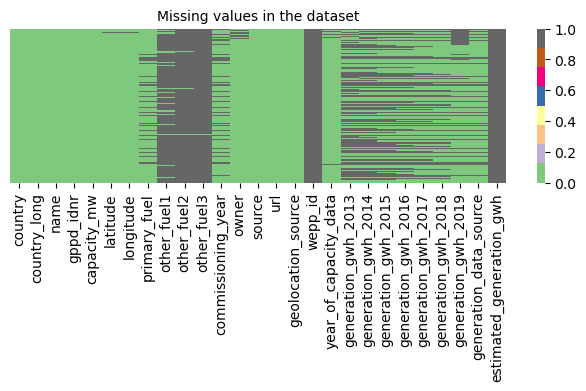

In [16]:
# Let's visualize it using heatmap
plt.figure(figsize=(8,2))
sns.heatmap(df.isnull(), yticklabels=False, cmap='Accent')
plt.title('Missing values in the dataset', fontsize=10);

Some columns present null values, and in some of them all the values are null, or the majority of them, like in other_fuel2, other_fuel3, wepp_id, estimated_generation_gwh. Considering that these columns will not provide any information to the model, we are going to drop them. There are other columns that present some null values too, we will analyze them one by one in order to determine if we can input the null values.

# 1.4.2 Columns with no info

As we saw previously there are columns with almost no information, so we will drop them. We will treat each column according to the percentage of null values, first, we will inspect the columns with 90% or more of missing values and drop them.

In [17]:
missing_val[missing_val['% of missing'] >= 90]

Null values  % of missing
other_fuel2                     13028         97.97
other_fuel3                     13206         99.31
wepp_id                         13298        100.00
estimated_generation_gwh        13298        100.00

In [18]:
cols_to_drop = missing_val[missing_val['% of missing'] > 90].index.to_list()

print(f"Columns to drop: {cols_to_drop}\nTotal columns to drop: {len(cols_to_drop)}")

df.drop(cols_to_drop, axis=1, inplace=True)
df.head(3)

Columns to drop: ['other_fuel2', 'other_fuel3', 'wepp_id', 'estimated_generation_gwh']
Total columns to drop: 4


country country_long                      name   gppd_idnr  capacity_mw  \
0     IND        India          ACME Solar Tower  WRI1020239          2.5   
1     IND        India       ADITYA CEMENT WORKS  WRI1019881         98.0   
2     IND        India  AES Saurashtra Windfarms  WRI1026669         39.2   

   latitude  longitude primary_fuel other_fuel1  commissioning_year  ...  \
0   28.1839    73.2407        Solar         NaN              2011.0  ...   
1   24.7663    74.6090         Coal         NaN                 NaN  ...   
2   21.9038    69.3732         Wind         NaN                 NaN  ...   

                     geolocation_source year_of_capacity_data  \
0  National Renewable Energy Laboratory                   NaN   
1                                   WRI                   NaN   
2                                   WRI                   NaN   

  generation_gwh_2013 generation_gwh_2014  generation_gwh_2015  \
0                 NaN                 NaN                  NaN   
1                 NaN                 NaN                  NaN   
2                 NaN                 NaN                  NaN   

   generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   

   generation_gwh_2019  generation_data_source  
0                  NaN                     NaN  
1                  NaN                     NaN  
2                  NaN                     NaN  

[3 rows x 23 columns]

We dropped 4 columns from the dataset because all their values were null.

Next, we will check the columns with missing values between 40% and 90%, and then the rest.

In [19]:
missing_val[(missing_val['% of missing'] >= 40) & (missing_val['% of missing'] < 90)].sort_values(by='% of missing', ascending=False)

Null values  % of missing
other_fuel1                11670         87.76
generation_gwh_2013         6128         46.08
generation_gwh_2014         5764         43.34

We are going to analyze the columns with missing values in order to determine if imputing the missing values adds value to our prediction models.

In [20]:
missing_val[(missing_val['% of missing'] > 0) & (missing_val['% of missing'] < 40)]

Null values  % of missing
capacity_mw                       6          0.05
latitude                         78          0.59
longitude                        78          0.59
primary_fuel                   2004         15.07
commissioning_year             2644         19.88
owner                           593          4.46
geolocation_source               23          0.17
year_of_capacity_data           438          3.29
generation_gwh_2015            5305         39.89
generation_gwh_2016            4597         34.57
generation_gwh_2017            4006         30.12
generation_gwh_2018            3440         25.87
generation_gwh_2019            3520         26.47
generation_data_source         2463         18.52

We will analyze these columns further in the next sections, in order to find the best way to treat them.

==>The columns other_fuel1 have a considerable percentage of missing values, so it is important to analyze them separately.

==>The percentage of missing values in capacity_mw,latitude, longitude,primary_fuel,commissioning_year,owner,geolocation_source	year_of_capacity_data,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019 and geolocation_data_source is low.

### 1.4.3 other_fluel1 feature

In [21]:
df.other_fuel1.unique()

array([nan, 'Oil', 'Cogeneration', 'Gas', 'Waste', 'Solar', 'Coal',
       'Biomass', 'Hydro', 'Storage', 'Other', 'Petcoke', 'Wind'],
      dtype=object)

In [22]:
df.other_fuel1.value_counts(normalize=True, dropna=False)

other_fuel1
NaN             0.877576
Oil             0.074146
Gas             0.026395
Coal            0.005339
Waste           0.004738
Storage         0.003234
Solar           0.002256
Hydro           0.001504
Biomass         0.001429
Other           0.001278
Petcoke         0.001128
Wind            0.000526
Cogeneration    0.000451
Name: proportion, dtype: float64

In [23]:
df.other_fuel1.value_counts(dropna=False)

other_fuel1
NaN             11670
Oil               986
Gas               351
Coal               71
Waste              63
Storage            43
Solar              30
Hydro              20
Biomass            19
Other              17
Petcoke            15
Wind                7
Cogeneration        6
Name: count, dtype: int64

other_fluel1 is a categorical variable with 12 unique values, where most of them are non-null data . If we input the missing values with the most frequent value this column will not give a lot of info to the prediction model. This column will be dropped.

### 1.4.4 Dropping columns: other_fluel1

In [24]:
df.drop(['other_fuel1'], axis=1, inplace=True)
print(f"We drop 2 more columns, the new dimension of the dataset is {df.shape}")

We drop 2 more columns, the new dimension of the dataset is (13298, 22)


### 1.4.5 Rows with no info

First, we identify the remaining columns with missing values.

In [25]:
#Storing only the columns with missing values
missing_val = missing_val[missing_val['Null values'] > 0]

# Dropping the rows refers to the columns already dropped
missing_val = missing_val.drop(cols_to_drop + ['other_fuel1'])
missing_val

Null values  % of missing
capacity_mw                       6          0.05
latitude                         78          0.59
longitude                        78          0.59
primary_fuel                   2004         15.07
commissioning_year             2644         19.88
owner                           593          4.46
geolocation_source               23          0.17
year_of_capacity_data           438          3.29
generation_gwh_2013            6128         46.08
generation_gwh_2014            5764         43.34
generation_gwh_2015            5305         39.89
generation_gwh_2016            4597         34.57
generation_gwh_2017            4006         30.12
generation_gwh_2018            3440         25.87
generation_gwh_2019            3520         26.47
generation_data_source         2463         18.52

In [26]:
 #Create a mask for rows where all specified columns have missing values
missing_values_col = missing_val.index.to_list()
mask = df[missing_values_col].isnull().all(axis=1)

# Use the mask to filter the DataFrame and get rows with all missing values
rows_with_all_missing = df[mask]

# Display the resulting rows
print(f"Columns with missing values: {missing_values_col}\n  Number of rows with null values: {rows_with_all_missing.shape[0]}\n")
print("Rows with null values:")
rows_with_all_missing 

Columns with missing values: ['capacity_mw', 'latitude', 'longitude', 'primary_fuel', 'commissioning_year', 'owner', 'geolocation_source', 'year_of_capacity_data', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'generation_gwh_2019', 'generation_data_source']
  Number of rows with null values: 0

Rows with null values:


Empty DataFrame
Columns: [country, country_long, name, gppd_idnr, capacity_mw, latitude, longitude, primary_fuel, commissioning_year, owner, source, url, geolocation_source, year_of_capacity_data, generation_gwh_2013, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017, generation_gwh_2018, generation_gwh_2019, generation_data_source]
Index: []

[0 rows x 22 columns]

The dataset does'nt contain row with null values

# 1.5 Features Analysis

### 1.5.1 Unique values

In [27]:
# Reviewing the number of unique values in each feature and the target
info_df = df.nunique().to_frame('No. of unique values')
info_df['type'] = df.dtypes.values
info_df

No. of unique values     type
country                                    3   object
country_long                               3   object
name                                   13266   object
gppd_idnr                              13298   object
capacity_mw                             2304  float64
latitude                               12385  float64
longitude                              12733  float64
primary_fuel                              14   object
commissioning_year                      1936  float64
owner                                   5877   object
source                                   206   object
url                                      325   object
geolocation_source                         5   object
year_of_capacity_data                      1  float64
generation_gwh_2013                     5616  float64
generation_gwh_2014                     6306  float64
generation_gwh_2015                     6692  float64
generation_gwh_2016                     7150  float64
generation_gwh_2017                     7630  float64
generation_gwh_2018                     8040  float64
generation_gwh_2019                     8368   object
generation_data_source                     3   object

From Above analysis:

   ==>There are variables with just 1 unique value like  year_of_capacity_data they do not contribute with valuable data for the prediction model since all the rows have the same value. Therefore we will drop them.
   
   ===>The variables name and gdpd_idnr have the same unique values as the dataset rows, these columns only serves to identify each record but doesn't influence the target variable. Therefore we can drop them.
   
   ==>primary_fuel is the target variable for the classification task and has 14 unique values of 13298	 total in the dataset, therefore we can confirm we are facing a classification problem.

   ==>capacity_mw is the other target variable with 2304 unique values of 13298 total in the dataset. We are facing a regression problem since the target variable is continuous and numerical.

### 1.5.1.1 Primary Fuel unique values

In [28]:
# Inspect the unique values of the target variable
column = 'primary_fuel'
print(f"Feature {column}:\n{df[column].value_counts()}\n")
print(f"# unique values: {df[column].nunique()}\n")

Feature primary_fuel:
primary_fuel
Solar           3480
Gas             2031
Hydro           1783
Wind            1340
Oil              961
Waste            595
Coal             572
Biomass          230
Storage          104
Nuclear           72
Geothermal        65
Cogeneration      34
Other             16
Petcoke           11
Name: count, dtype: int64

# unique values: 14



As we can see the target variable has 14 unique values of the 13298 rows in the dataset. In order to predict this feature we need to build a classification model. The dataset seems to be imbalanced.

### 1.5.1.2 Capacity_mw unique values

In [29]:
# Inspect the unique values of the target variable
column = 'capacity_mw'
print(f"Feature {column}:\n{df[column].value_counts()}\n")
print(f"# unique values: {df[column].nunique()}\n")

Feature capacity_mw:
capacity_mw
0.0       2030
5.0        552
1.0        534
2.0        479
1.5        267
          ... 
119.1        1
251.8        1
153.9        1
1454.6       1
596.7        1
Name: count, Length: 2304, dtype: int64

# unique values: 2304



The capacity_mw column has 2304 unique values of the 13298 rows in the dataset. To predict this feature we are going to apply a regression model since the variable is numerical and continuous.

### 1.5.1.3 Columns with only 1 unique value

In [30]:
# Inspect the unique values in columns to drop
for column in ['year_of_capacity_data']:
    print(f"Feature {column}:\n{df[column].value_counts()}\n")
    print(f"Unique values: {df[column].unique()}\n")
    print(f"# unique values: {df[column].nunique()}\n")

Feature year_of_capacity_data:
year_of_capacity_data
2019.0    12860
Name: count, dtype: int64

Unique values: [  nan 2019.]

# unique values: 1



Here we confirm that these column has the same value for all the records.

### 1.5.1.4 Dropping columns

In [31]:
# Define columns to drop
columns_to_drop = ['name', 'gppd_idnr','year_of_capacity_data']  # only one value
columns_to_drop

['name', 'gppd_idnr', 'year_of_capacity_data']

In [32]:
df.drop(columns_to_drop, axis=1, inplace=True)

In [33]:
# checking the dimension of the dataset
df.shape

print(f"The rows and columns in the dataset: {df.shape}")
print(f"\nThe column headers in the dataset: {df.columns}")

The rows and columns in the dataset: (13298, 19)

The column headers in the dataset: Index(['country', 'country_long', 'capacity_mw', 'latitude', 'longitude',
       'primary_fuel', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'generation_gwh_2013', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_gwh_2018', 'generation_gwh_2019', 'generation_data_source'],
      dtype='object')


### 1.5.1.6 Independent variables unique values

In [34]:
# Separating Numerical and Categorical columns

# Checking for categorical and Numerical columns
categorical_col = []
numerical_col = []

for i in df.columns:
    if df.dtypes[i] == 'object':
        categorical_col.append(i)
    else:
        numerical_col.append(i)
print(f"Categorical Columns: {categorical_col}")
print(f"Numerical Columns: {numerical_col}")

Categorical Columns: ['country', 'country_long', 'primary_fuel', 'owner', 'source', 'url', 'geolocation_source', 'generation_gwh_2019', 'generation_data_source']
Numerical Columns: ['capacity_mw', 'latitude', 'longitude', 'commissioning_year', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']


### Categorical columns

In [35]:
# First we are going to remove the target variable which has already been analyzed
categorical_col.remove('primary_fuel')
categorical_col

['country',
 'country_long',
 'owner',
 'source',
 'url',
 'geolocation_source',
 'generation_gwh_2019',
 'generation_data_source']

In [36]:
for column in categorical_col:
    print(f"Feature {column}:\n{df[column].value_counts(dropna=False)}\n")
    print(f"# unique values: {df[column].nunique()}\n")

Feature country:
country
USA    11879
IND      907
AUS      512
Name: count, dtype: int64

# unique values: 3

Feature country_long:
country_long
United States of America    11879
India                         907
Australia                     512
Name: count, dtype: int64

# unique values: 3

Feature owner:
owner
NaN                              593
Cypress Creek Renewables         198
Sustainable Power Group  LLC      99
Pacific Gas & Electric Co.        90
Southern California Edison Co     86
                                ... 
Pure Hedge LLC                     1
LaPorte Power  LLC                 1
Evonik Degussa Corporation         1
Evergreen BioPower LLC             1
Zumbro Garden LLC                  1
Name: count, Length: 5878, dtype: int64

# unique values: 5877

Feature source:
source
U.S. Energy Information Administration                11833
Central Electricity Authority                           519
Australian Renewable Energy Mapping Infrastructure      512
CDM       

From above analysis:
    
    ==>Country and country_long has 3 unique values of the 13298 rows in the dataset.these columns only serves to identify  country name but doesn't influence the target variable. Therefore we can drop them.
    
     ==>Owner column, its purpose is only to identify the plant ,doesn't influence the target variable.Therefore we can drop them.
     
     ==>The Feature generation_gwh_2019 has 8368 unique values of the 13298 in the dataset.It have 3520 null values,if we impute this with most frequent one,the model will get biased ,so we will drop this
     
     ==>The feature geolocation_data_source has 3 unique values of the 13298 in the dataset.It have 2463 null values,if we impute this with most frequent one,the model will get biased ,so we will drop this too
        
     ==>The featutre source 206 and 325 unique values respectively. 
       
     ==>The feature geolocation_source has 5 unique values.
     
     

### Dropping the column

Reasom for dropping the column answered previously

In [37]:
df.drop(['country','country_long','generation_gwh_2019','owner','generation_data_source'], axis=1, inplace=True)
print(f"We drop 5 more columns, the new dimension of the dataset is {df.shape}")

We drop 5 more columns, the new dimension of the dataset is (13298, 14)


### Numerical columns

In [38]:
# we are going to remove the target variable which has already been analyzed
numerical_col.remove('capacity_mw')
numerical_col

['latitude',
 'longitude',
 'commissioning_year',
 'generation_gwh_2013',
 'generation_gwh_2014',
 'generation_gwh_2015',
 'generation_gwh_2016',
 'generation_gwh_2017',
 'generation_gwh_2018']

In [39]:
for column in numerical_col:
    print(f"Feature {column}:\n{df[column].value_counts()}\n")
    print(f"# unique values: {df[column].nunique()}\n")

Feature latitude:
latitude
39.4360    7
38.3026    6
36.7160    5
34.7231    5
42.2060    5
          ..
41.6229    1
37.2367    1
42.4875    1
40.4433    1
39.7373    1
Name: count, Length: 12385, dtype: int64

# unique values: 12385

Feature longitude:
longitude
-76.2200     7
-121.2958    6
-114.6460    6
-118.2897    5
-120.4150    4
            ..
-87.7350     1
-87.6690     1
-152.4042    1
-77.7048     1
-112.0478    1
Name: count, Length: 12733, dtype: int64

# unique values: 12733

Feature commissioning_year:
commissioning_year
2017.000000    691
2019.000000    598
2018.000000    596
2016.000000    569
2015.000000    466
              ... 
1984.319444      1
2006.435897      1
1974.465556      1
2000.684211      1
2013.775510      1
Name: count, Length: 1936, dtype: int64

# unique values: 1936

Feature generation_gwh_2013:
generation_gwh_2013
 0.00000     690
 0.00300      14
 0.01000      12
 0.00700      11
 0.01300      10
            ... 
 14.18625      1
 21.20700      1

==>The features latitude, longitude, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017, and generation_gwh_2018 are numerical and continuous.

==>We find that some of the columns have many records with value 0, as follows:generation_gwh_2013 (690 zeros) generation_gwh_2014 (706 zeros), generation_gwh_2015 (751 zeros), generation_gwh_2016 (863 zeros), generation_gwh_2017 (877 zeros), generation_gwh_2018 (907 zeros)

### 1.5.2 Imputing Missing values

In [40]:
# Reviewing the missing values in the remaining data
missing_val = df.isnull().sum().to_frame("Null values")

# Calculate the % of the null values
missing_val["% of missing"] = round(missing_val['Null values'] / len(df) * 100,2)

missing_val = missing_val[missing_val['Null values'] > 0]
missing_val

Null values  % of missing
capacity_mw                    6          0.05
latitude                      78          0.59
longitude                     78          0.59
primary_fuel                2004         15.07
commissioning_year          2644         19.88
geolocation_source            23          0.17
generation_gwh_2013         6128         46.08
generation_gwh_2014         5764         43.34
generation_gwh_2015         5305         39.89
generation_gwh_2016         4597         34.57
generation_gwh_2017         4006         30.12
generation_gwh_2018         3440         25.87

As we can see there are still missing values in 12 columns. In the majority of them, we are going to impute the missing values.

### 1.5.2.1 Commissioning year missing values

In [41]:
# Inspecting the values in the column commissioning_year
df.commissioning_year.value_counts()

commissioning_year
2017.000000    691
2019.000000    598
2018.000000    596
2016.000000    569
2015.000000    466
              ... 
1984.319444      1
2006.435897      1
1974.465556      1
2000.684211      1
2013.775510      1
Name: count, Length: 1936, dtype: int64

Since this column represents a year, it could be considered categorical although is numerical. In this case, we use the mode to impute the missing values which represent 19.88% of the data

In [42]:
#Counting the number of null values in the column 
col = 'commissioning_year'
print(f"Missing values in {col}: {df[col].isnull().sum()}")

# Get the mode 
mode_value = df[col].mode()[0]  #the [0] is used to get the first mode if there are multiple
print(f"Impute the missing values with the mode {mode_value}")

# Impute the missing values using the mode
df[col].fillna(mode_value, inplace=True)  # Fill missing values with the mode value

print(f"Missing values in {col}: {df[col].isnull().sum()}")

Missing values in commissioning_year: 2644
Impute the missing values with the mode 2017.0
Missing values in commissioning_year: 0


### 1.5.2.2 Generation gwh missing values

In [43]:
generation_col = ['generation_gwh_2013','generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']

# Reviewing the Skew in the generation gwh columns
df[generation_col].skew()

generation_gwh_2013    6.218941
generation_gwh_2014    6.039632
generation_gwh_2015    6.347904
generation_gwh_2016    6.678996
generation_gwh_2017    6.974726
generation_gwh_2018    7.130250
dtype: float64

In [44]:
# listing the possible imputation values for each column
for col in generation_col:
    print(f"Column={col} Mode={df[col].mode()[0]} Median(50%)={df[col].median():.6f}  Mean={df[col].mean():.6f}")

Column=generation_gwh_2013 Mode=0.0 Median(50%)=21.384500  Mean=563.383222
Column=generation_gwh_2014 Mode=0.0 Median(50%)=22.241000  Mean=635.739731
Column=generation_gwh_2015 Mode=0.0 Median(50%)=19.504000  Mean=616.801877
Column=generation_gwh_2016 Mode=0.0 Median(50%)=15.410278  Mean=561.784508
Column=generation_gwh_2017 Mode=0.0 Median(50%)=13.433861  Mean=532.472482
Column=generation_gwh_2018 Mode=0.0 Median(50%)=12.308500  Mean=513.679016


Seems these columns are skewed to the right since the mean value is larger than the median(50%). Therefore, we will use the median to impute the missing values.

In [45]:
for col in generation_col:
    # Counting the number of null values in the column 
    print(f"Missing values in {col}: {df[col].isnull().sum()}")

    # Get the median 
    impute_value = round(df[col].median(),6) 
    print(f"Impute the missing values in {col} with the median: {impute_value}")

    # Impute the missing values using the mode
    df[col].fillna(impute_value, inplace=True)  # Fill missing values with the impute value

    print(f"Missing values in {col}: {df[col].isnull().sum()}\n")

Missing values in generation_gwh_2013: 6128
Impute the missing values in generation_gwh_2013 with the median: 21.3845
Missing values in generation_gwh_2013: 0

Missing values in generation_gwh_2014: 5764
Impute the missing values in generation_gwh_2014 with the median: 22.241
Missing values in generation_gwh_2014: 0

Missing values in generation_gwh_2015: 5305
Impute the missing values in generation_gwh_2015 with the median: 19.504
Missing values in generation_gwh_2015: 0

Missing values in generation_gwh_2016: 4597
Impute the missing values in generation_gwh_2016 with the median: 15.410278
Missing values in generation_gwh_2016: 0

Missing values in generation_gwh_2017: 4006
Impute the missing values in generation_gwh_2017 with the median: 13.433861
Missing values in generation_gwh_2017: 0

Missing values in generation_gwh_2018: 3440
Impute the missing values in generation_gwh_2018 with the median: 12.3085
Missing values in generation_gwh_2018: 0



### 1.5.2.3 Geolocation Source missing values

In [46]:
df.geolocation_source.value_counts(dropna=False)

geolocation_source
U.S. Energy Information Administration                11833
WRI                                                     807
Australian Renewable Energy Mapping Infrastructure      512
Industry About                                          119
NaN                                                      23
National Renewable Energy Laboratory                      4
Name: count, dtype: int64

Since this feature is categorical we are going to use the mode to impute the 23 missing values.

In [47]:
# Counting the number of null values in the column 
col = 'geolocation_source'
print(f"Missing values in {col}: {df[col].isnull().sum()}")

# Get the mode 
mode_value = df[col].mode()[0]  #the [0] is used to get the first mode if there are multiple
print(f"Impute the missing values with the mode {mode_value}")

# Impute the missing values using the mode
df[col].fillna(mode_value, inplace=True)  # Fill missing values with the mode value

print(f"Missing values in {col}: {df[col].isnull().sum()}")

Missing values in geolocation_source: 23
Impute the missing values with the mode U.S. Energy Information Administration
Missing values in geolocation_source: 0


### 1.5.2.4 Latitude and longitude missing values

In [48]:
# Inspecting the missing values in latitud and longitude 
df[df['latitude'].isna() | df['longitude'].isna() ].shape

(78, 14)

Considering the proportion of missing values in the latitude and longitude column is small, imputing latitude and longitude values may not always make sense, especially if the data represents specific geographic locations. Therefore deleting the 78 rows with missing values ensures that the imputed values do not introduce bias into our analysis.

In [49]:
# Dropping the missing values in latitude and longitude
df_new = df.dropna(subset=['latitude','longitude'])

print(f"{df.shape[0] - df_new.shape[0]} rows with missing values were deleted.")
print(f"This represent {round((df.shape[0] - df_new.shape[0]) / df.shape[0] *100, 2)}% of the data.")
print(f"In the new dataset there are {df_new.shape[0]} rows and {df.shape[1]} columns.")
df = df_new.copy()

78 rows with missing values were deleted.
This represent 0.59% of the data.
In the new dataset there are 13220 rows and 14 columns.


### 1.5.2.5 capacity_mw missing values

In [50]:
# Inspecting the values in the column capacity_mw
df.capacity_mw.value_counts()

capacity_mw
0.0       2002
5.0        549
1.0        534
2.0        479
1.5        267
          ... 
119.1        1
251.8        1
153.9        1
1454.6       1
596.7        1
Name: count, Length: 2302, dtype: int64

The column capacity_mw is in numerical and contionous,we will impute this with median or with mean

In [51]:
# listing the possible imputation values for each column
col="capacity_mw"

print(f"Column={col} Mode={df[col].mode()[0]} Median(50%)={df[col].median():.6f}  Mean={df[col].mean():.6f}")

Column=capacity_mw Mode=0.0 Median(50%)=5.500000  Mean=118.216832


Seems capacity_mw is skewed to the right since the mean value is larger than the median(50%). Therefore, we will use the median to impute the missing values.

In [52]:
col="capacity_mw" 
    
print(f"Missing values in {col}: {df[col].isnull().sum()}")

# Get the median 
impute_value = round(df[col].median(),6) 
print(f"Impute the missing values in {col} with the median: {impute_value}")

# Impute the missing values using the mode
df[col].fillna(impute_value, inplace=True)  # Fill missing values with the impute value

print(f"Missing values in {col}: {df[col].isnull().sum()}\n")

Missing values in capacity_mw: 6
Impute the missing values in capacity_mw with the median: 5.5
Missing values in capacity_mw: 0



### 1.5.2.6 primary_fuel missing values

In [53]:
df.primary_fuel.value_counts(dropna=False)

primary_fuel
Solar           3476
Gas             2030
NaN             1976
Hydro           1765
Wind            1325
Oil              954
Waste            595
Coal             567
Biomass          230
Storage          104
Nuclear           72
Geothermal        65
Cogeneration      34
Other             16
Petcoke           11
Name: count, dtype: int64

The Feature primary_fuel has 14 unique values of the 13220 in the dataset.It have 1976 null values,if we impute this with most frequent one,the model will get biased ,so we will drop the rows with null values

In [54]:
# Dropping the missing values in latitude and longitude
df_new = df.dropna(subset=['primary_fuel'])

print(f"{df.shape[0] - df_new.shape[0]} rows with missing values were deleted.")
print(f"This represent {round((df.shape[0] - df_new.shape[0]) / df.shape[0] *100, 2)}% of the data.")
print(f"In the new dataset there are {df_new.shape[0]} rows and {df.shape[1]} columns.")
df = df_new.copy()

1976 rows with missing values were deleted.
This represent 14.95% of the data.
In the new dataset there are 11244 rows and 14 columns.


### 1.5.2.7 Last check for missing values

In [55]:
df.isnull().sum().sum()

0

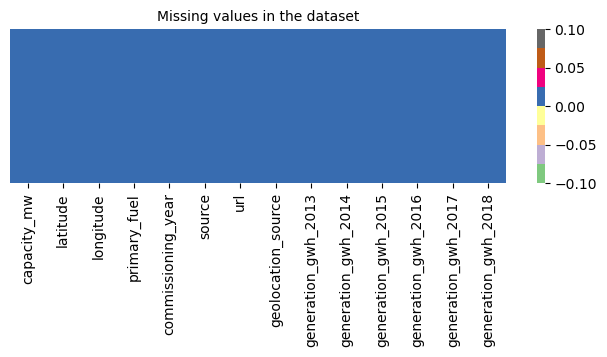

In [56]:
# Let's visualize it using heatmap
plt.figure(figsize=(8,2))
sns.heatmap(df.isnull(), yticklabels=False, cmap='Accent')
plt.title('Missing values in the dataset', fontsize=10);

In [57]:
df.shape

(11244, 14)

Now, the studied dataframe has 11244 rows and 14 columns with no missing values.

# 1.5.3 Summary statistics of the numerical and non-numerical variables

In [58]:
# Summary statistics of numerical columns
stats = df.describe()
stats

capacity_mw      latitude     longitude  commissioning_year  \
count  11244.000000  11244.000000  11244.000000        11244.000000   
mean     138.931895     34.469234    -70.365925         1999.233899   
std      373.496498     16.112420     67.225194           23.749877   
min        0.000000    -42.888300   -171.712400         1896.000000   
25%        3.000000     33.783675   -104.798650         1989.000000   
50%       10.000000     38.347800    -86.339800         2010.000000   
75%       79.275000     42.166550    -74.629950         2016.000000   
max     6809.000000     71.292000    153.434100         2020.000000   

       generation_gwh_2013  generation_gwh_2014  generation_gwh_2015  \
count         11244.000000         11244.000000         11244.000000   
mean            351.361158           419.862329           433.903662   
std            1610.398123          1794.101608          1816.767182   
min            -947.600000          -989.619000          -864.428000   
25%               9.828750             8.232432             6.273750   
50%              21.384500            22.241000            19.504000   
75%              44.240000            58.495750            66.339750   
max           31431.080000         32320.917000         32525.595000   

       generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  
count         11244.000000         11244.000000         11244.000000  
mean            430.131516           435.316631           447.806768  
std            1807.538295          1818.629202          1839.554362  
min            -768.620000          -934.944000          -982.622000  
25%               4.390250             3.518500             3.024000  
50%              15.410278            13.433861            12.308500  
75%              76.659472            87.781500           100.234750  
max           32377.477000         35116.000000         35136.000000

In [59]:
# Look at the non numeric columns
df.describe(exclude=[np.number])

primary_fuel                                  source  \
count         11244                                   11244   
unique           14                                     206   
top           Solar  U.S. Energy Information Administration   
freq           3476                                    9829   

                                                 url  \
count                                          11244   
unique                                           309   
top     http://www.eia.gov/electricity/data/browser/   
freq                                            9829   

                            geolocation_source  
count                                    11244  
unique                                       5  
top     U.S. Energy Information Administration  
freq                                      9829

==>There is **no negative value present**

==>There is **no missing values**

==>The mean value is greater than the median(50%)generation gwh features, capacity_mw columns which means the **data is skewed to right**.

==>The column commissioning_year represents a year, it could be **considered categorical although is numerical**

==>>By summarizing the data we can observe there is a huge difference between 75% and max in many columns, hence there are **outliers presented in the data**

==>==>we can also notice the **standard deviation,min,25% percentile** value from this describe method

### 1.5.3 Duplicates

In [60]:
# Searching for duplicated values
df[df.duplicated()].shape

(4, 14)

There are 4 duplicate values presents in the dataset.

### Removing duplicates

In [61]:
df = df.drop_duplicates()

In [62]:
# Searching for duplicated values
df[df.duplicated()].shape

(0, 14)

In [63]:
df.shape #checking the new dimension of the dataset

(11240, 14)

# 1.6 Data Visualization

### 1.6.1 Univariate Analysis

### 1.6.1.1 capacity_mw feature

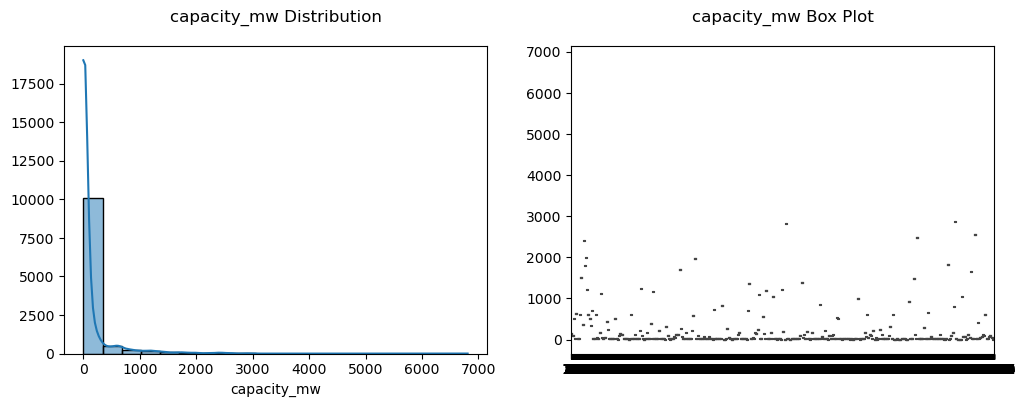

Skewness of capacity_mw : 5.030544787805087


In [63]:
#Visualize target distribution
col = 'capacity_mw'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.set_palette('coolwarm')
sns.histplot(df[col], kde=True , bins=20, ax=axes[0])
sns.boxplot(df[col], ax=axes[1])

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness 
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of capacity_mw is skewed to the right. There are outliers present in the Box plot.

### 1.6.1.2 Primary fuel feature

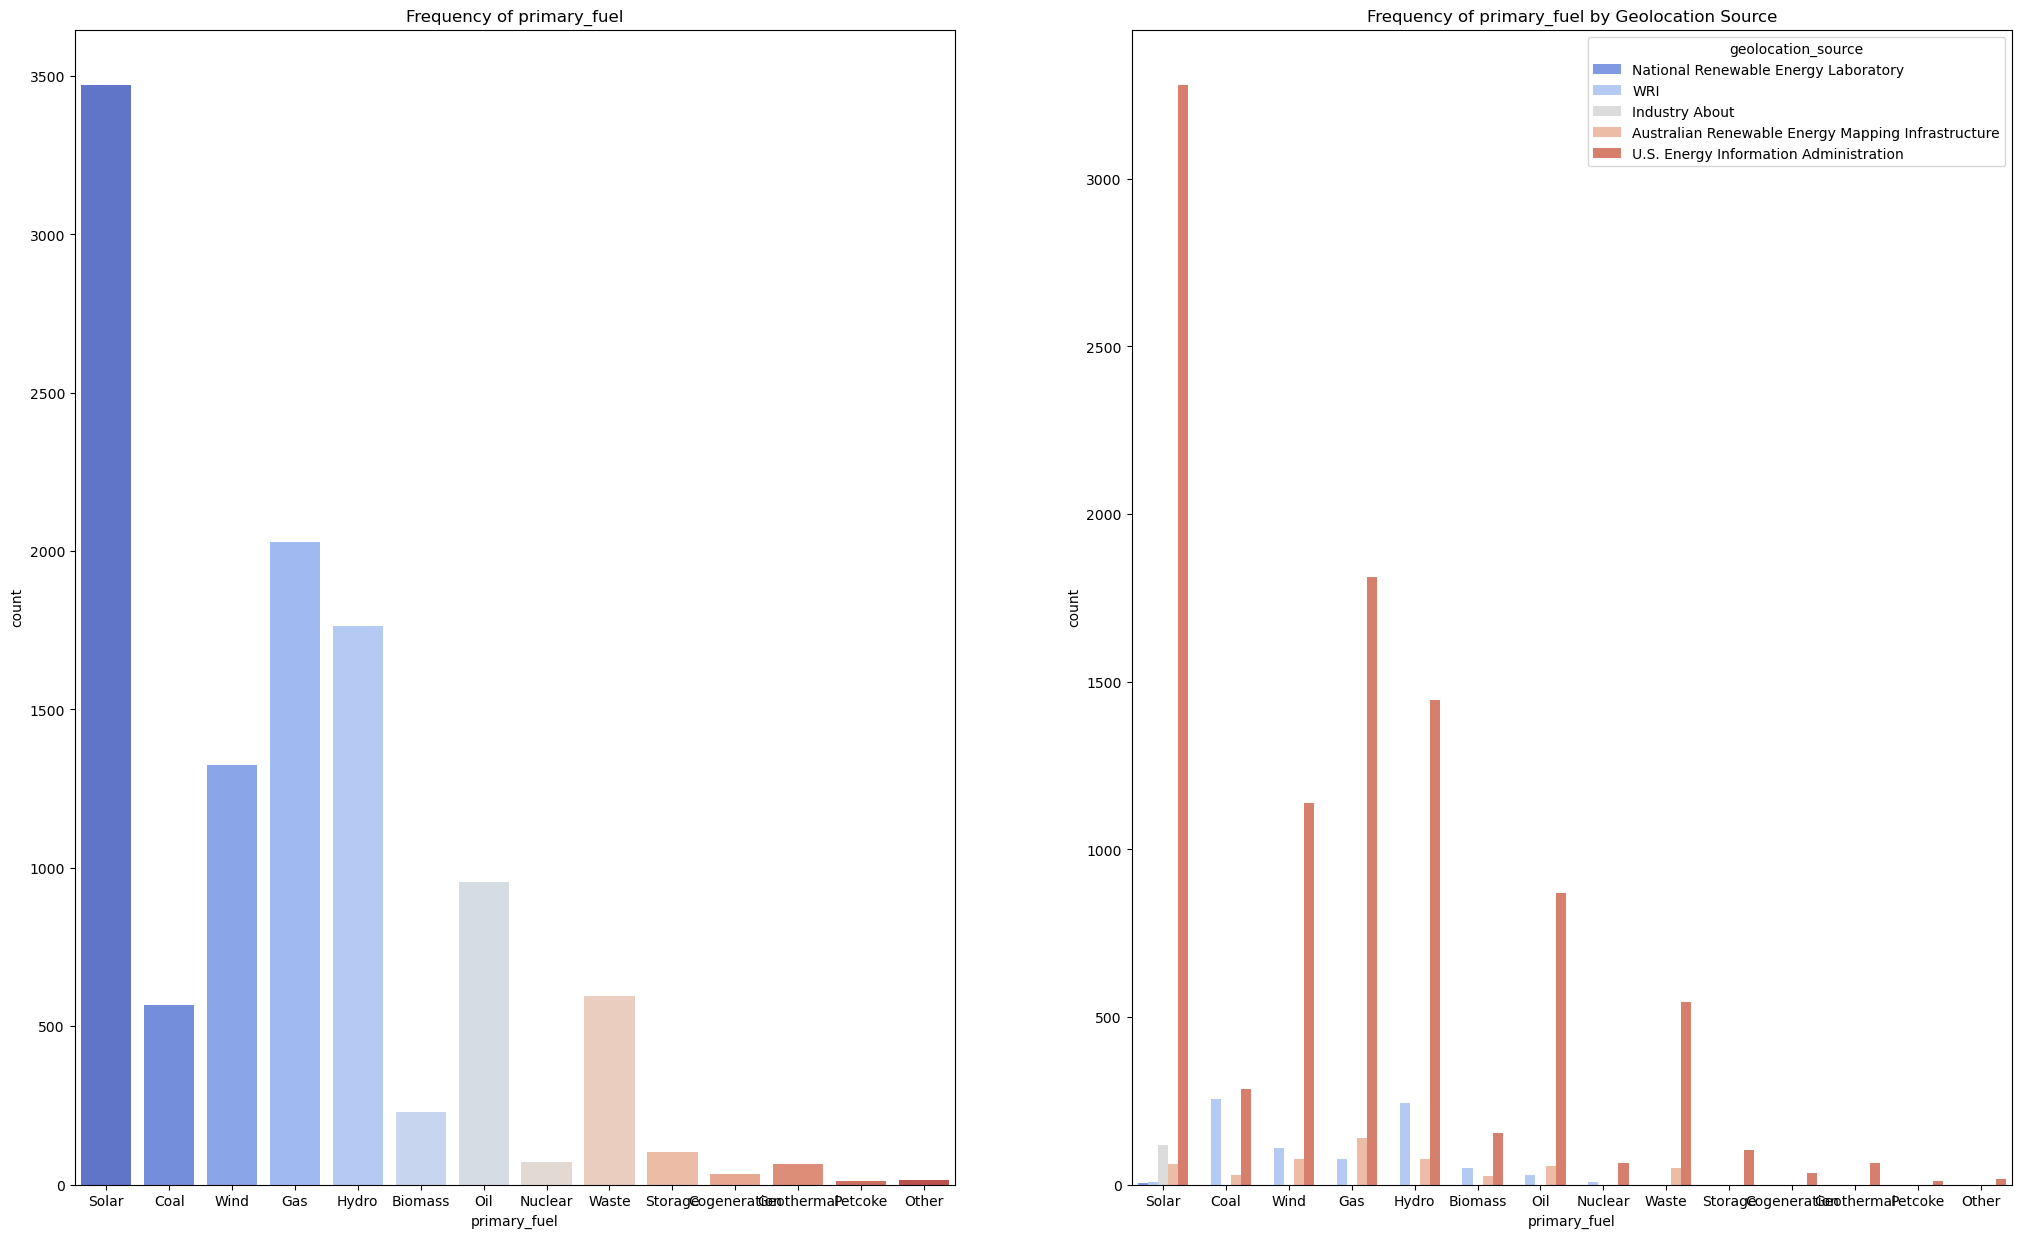

In [73]:
# Visualize the frequency of categorical target
fig, axs = plt.subplots(1, 2, figsize=(25, 15))

column = 'primary_fuel'
sns.countplot(data=df, x=column, ax=axs[0], palette='coolwarm')
axs[0].set_title(f"Frequency of {column}")

sns.countplot(data=df, x=column, ax=axs[1], hue='geolocation_source', palette='coolwarm')
axs[1].set_title(f"Frequency of {column} by Geolocation Source")

plt.subplots_adjust(hspace=0.5)
plt.show()

In [70]:
df[column].value_counts(normalize=True)

primary_fuel
Solar           0.308986
Gas             0.180605
Hydro           0.157028
Wind            0.117883
Oil             0.084875
Waste           0.052936
Coal            0.050445
Biomass         0.020374
Storage         0.009253
Nuclear         0.006406
Geothermal      0.005783
Cogeneration    0.003025
Other           0.001423
Petcoke         0.000979
Name: proportion, dtype: float64

==>30.89% of the data correspond to Solar, followed by 18.06% with gas, and 14.70% as Hydro primary fuel.

==>The feature "primary_fuel" is imbalanced. We will balance when the classification prediction model is built.

### 1.6.1.3 Independent variables

#### Categorical columns

In [64]:
categorical_col=['source', 'url', 'geolocation_source']
categorical_col

['source', 'url', 'geolocation_source']

Since the source and url have too many unique values we are going to plot only the 40 most representative values. These columns will be encoded later.

### Source

In [78]:
# Subsetting the 40 Most representative values
column = 'source'
data = df[column].value_counts()[:40].to_frame('Frequency')
data

Frequency
source                                                       
U.S. Energy Information Administration                   9825
Australian Renewable Energy Mapping Infrastructure        512
Central Electricity Authority                             492
CDM                                                       109
CEPR                                                       14
Lancosola                                                  10
PREPA                                                       9
National Thermal Power Corporation (NTPC)                   6
Guam Power Authority                                        6
Maharashtra State Power Generation Co Ltd (MAHA...          4
Reliance Power Ltd                                          4
Acc Acc ltd                                                 4
Jk Cement ltd                                               4
Rajasthan Renewable Energy Corporation Limited ...          4
National Renewable Energy Laboratory                        4
Ujaas Energy Limited                                        3
Shri Ssk ltd                                                3
Jaypee Ltd jccl)                                            3
SunBorne Energy Gujarat One Private Limited                 3
Ministry of New and Renewable Energy                        3
Karnataka Power Corporation Limited                         3
PEDA                                                        3
PREPA; CEPR                                                 3
Hindustan Zinc ltd                                          3
Solairedirect                                               3
Shree Sugars ltd                                            3
Vardham Vardham group                                       2
Birla Corp ltd                                              2
Ambuja Cements ltd                                          2
Welspun Solar Punjab Private Limited                        2
Shree Cement ltd                                            2
Lloyds Industries ltd                                       2
Nsl Sugars ltd                                              2
Moser Baer Clean Energy Limited (MBCEL)                     2
Rashtriya & fert                                            2
Azure Power (Rajasthan) Private Limited                     2
Jsw Steel ltd                                               2
Ultratech Cement ltd                                        2
Solar for India                                             2
Ballarpur Industries ltd                                    2

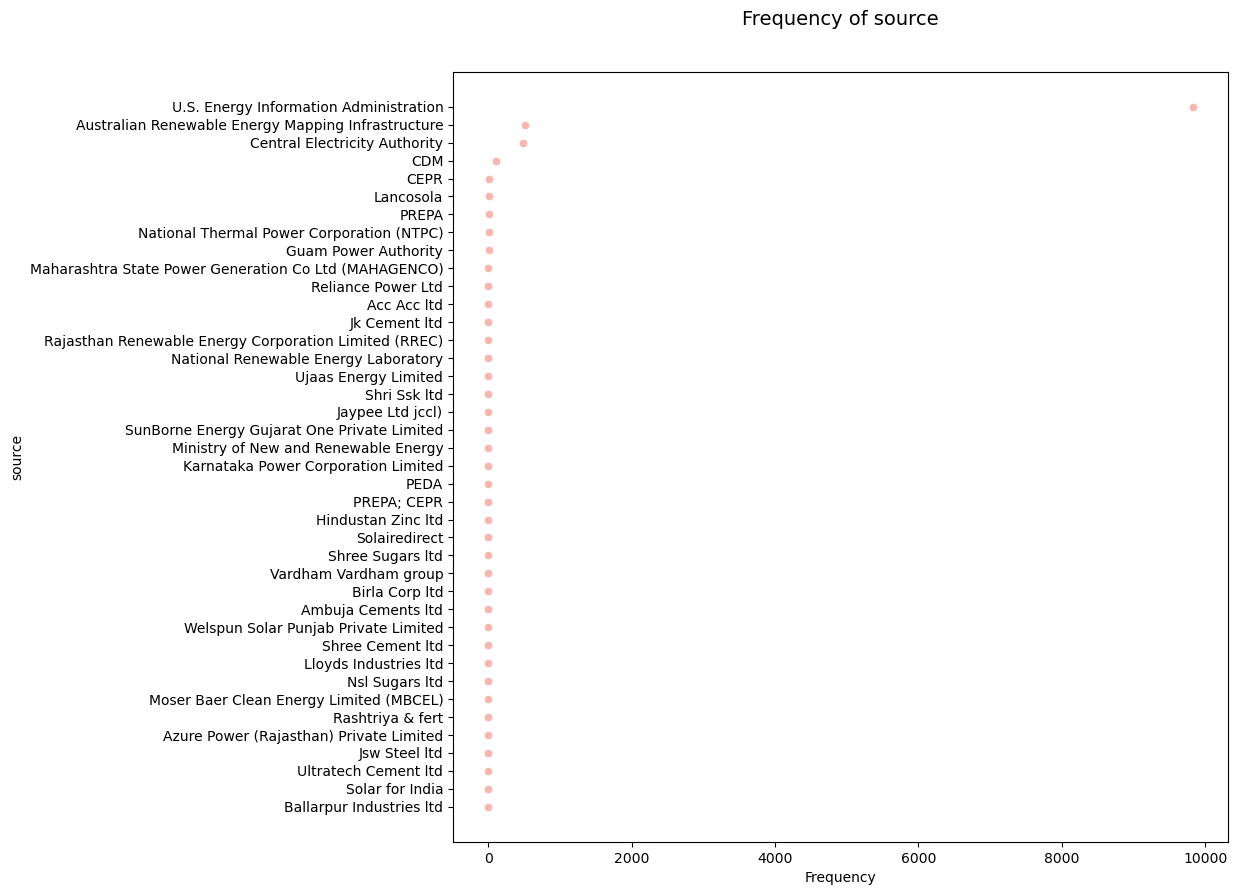

In [79]:
# Set the custom palette
sns.set_palette('Pastel1')

# Visualize the frequency of categorical variables
plt.figure(figsize=(10, 10))
ax = sns.scatterplot(y=data.index, x='Frequency', data=data)

plt.title(f"Frequency of {column}", size=14, y=1.05);

### URL

In [80]:
# Subsetting the 40 Most representative values
column = 'url'
data = df[column].value_counts()[:40].to_frame('Frequency')
data

Frequency
url                                                          
http://www.eia.gov/electricity/data/browser/             9825
https://www.nationalmap.gov.au/                           512
http://www.cea.nic.in/                                    492
http://energia.pr.gov/datos/plantas/                       16
http://www.lancosolar.com/pdfs/rajasthan-pv-pro...          7
http://www.guampowerauthority.com/gpa_authority...          6
http://www.ntpc.co.in                                       6
http://viainfotech.biz/Biomass/theme5/document/...          5
http://www.mahaurja.com/PDF/PG2_GridConnSPPComm...          4
http://www.azurepower.com                                   4
http://www.welspunrenewables.com                            4
http://www.acclimited.com/                                  4
http://www.moserbaersolar.com                               4
http://www.peda.gov.in/main/SPVPowerProjects.html           4
http://energy.rajasthan.gov.in/content/dam/raj/...          4
https://cdm.unfccc.int/Projects/DB/BVQI13513120...          3
http://sunborneenergy.com                                   3
http://www.hzlindia.com/                                    3
http://mahagenco.in                                         3
http://www.prepa.com/historia_eng.asp; http://e...          3
http://www.renukasugars.com/                                3
http://www.tatapowersolar.com                               3
http://karnatakapower.com                                   3
https://cdm.unfccc.int/filestorage/D/O/R/DORZF7...          3
http://ujaas.com                                            3
http://www.jalindia.com/subsidiaries.html                   3
http://www.rrecl.com/PDF/Details%20of%20Rajasth...          2
https://cdm.unfccc.int/filestorage/d/d/56KO8FQN...          2
https://cdm.unfccc.int/Projects/DB/PJR%20CDM135...          2
http://www.lancosolar.com                                   2
http://www.adanipower.com                                   2
http://mnre.gov.in/file-manager/UserFiles/State...          2
https://www.vardhman.com/                                   2
http://www.lloyds.in/                                       2
http://www.reliancepower.co.in                              2
http://www.manikgarhcement.com/                             2
http://www.shreecement.in/                                  2
http://www.jsw.in/                                          2
https://cdm.unfccc.int/Projects/DB/KBS_Cert1356...          2
http://www.birlacorporation.com/                            2

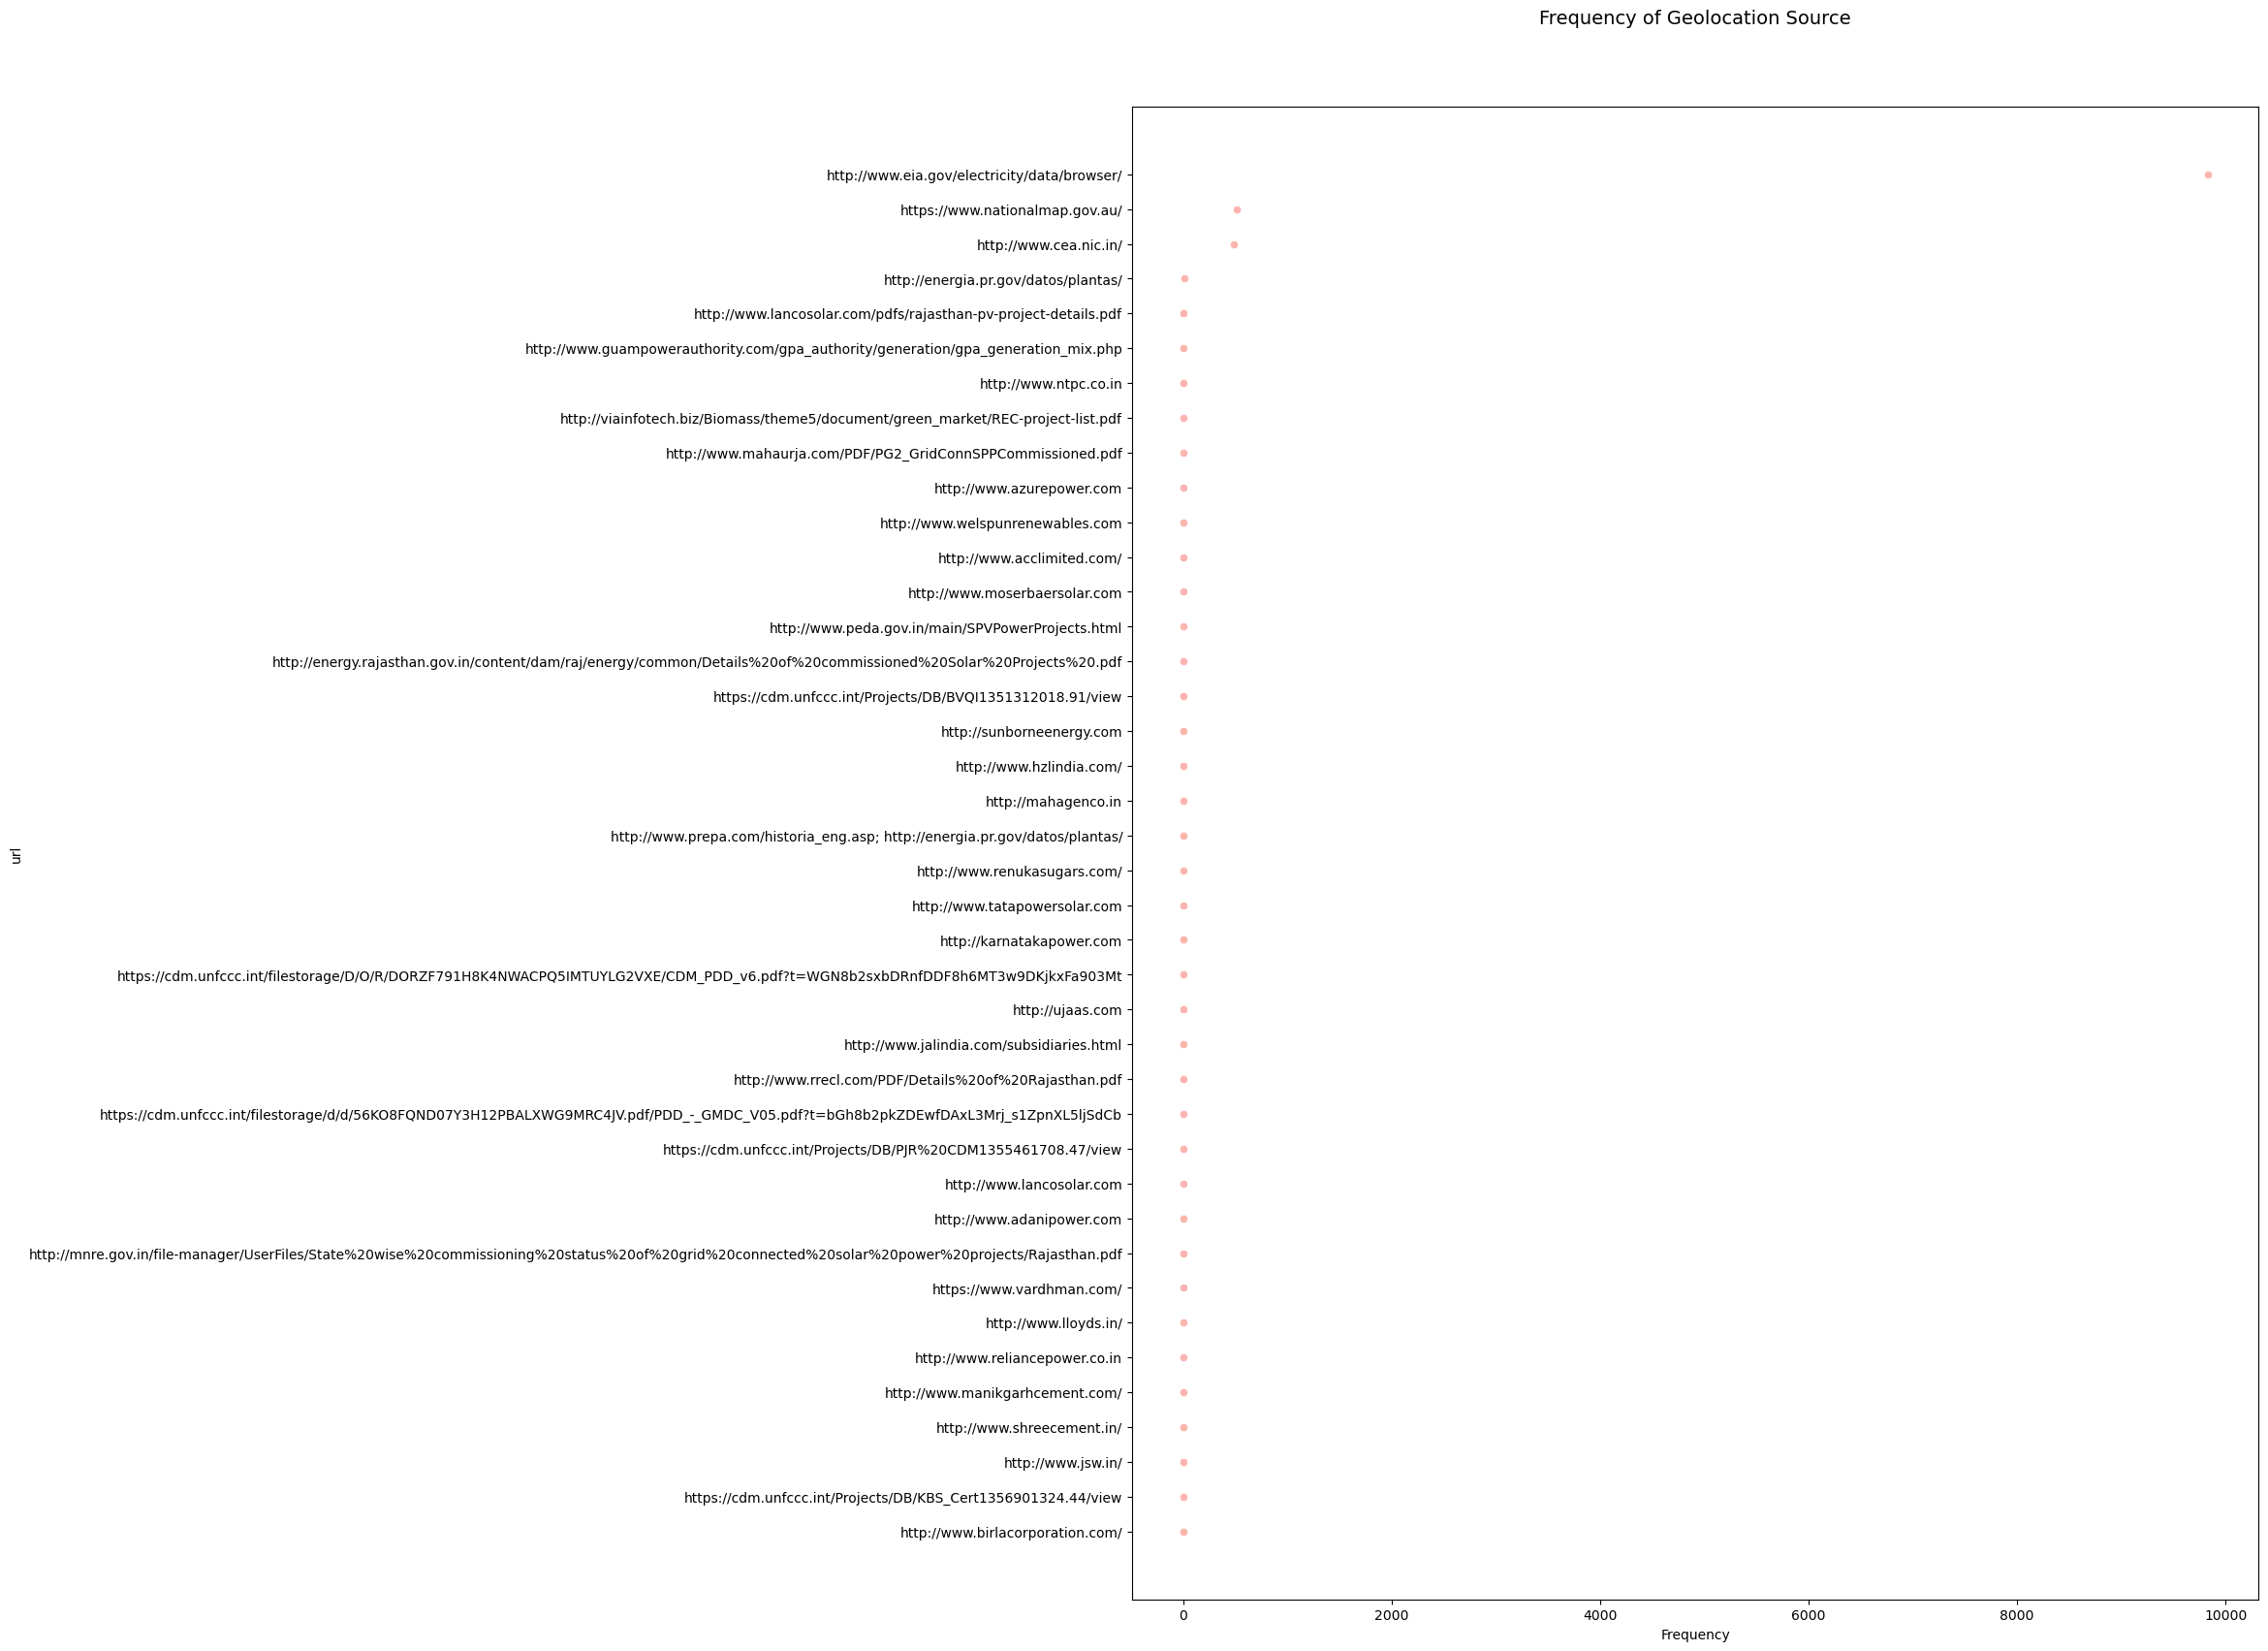

In [81]:
# Set the custom palette
sns.set_palette('Pastel1')

# Visualize the frequency of categorical variables
plt.figure(figsize=(15, 20))
ax = sns.scatterplot(y=data.index, x='Frequency', data=data)
# show_percentage(ax, len(df)) 

# plt.xlabel('Geolocation Source', size=10, labelpad=8)
# plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of Geolocation Source", size=14, y=1.05);

### Geolocation Source

### Custom Function for showing percentage in graph

In [82]:
def show_percentage(ax, total):
    ''' Shows the representative percentage in each bar in a countplot.'''
    for p in ax.patches:
        percentage = f"{100 * p.get_height()/total:.1f} %"
        x = p.get_x() + p.get_width() / 2 - 0.02
        y = p.get_height()
        ax.annotate(percentage, (x, y), fontsize=10, ha='center')

count
geolocation_source                                       
U.S. Energy Information Administration               9825
WRI                                                   780
Australian Renewable Energy Mapping Infrastructure    512
Industry About                                        119
National Renewable Energy Laboratory                    4

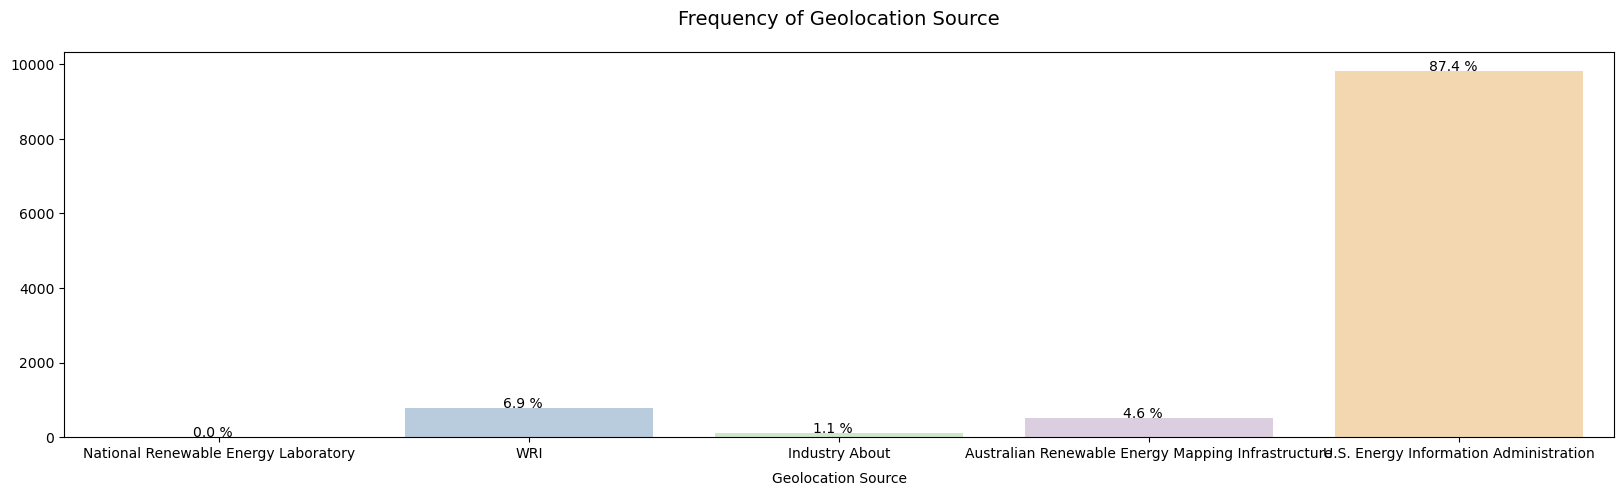

In [91]:
# Set the custom palette
sns.set_palette('Pastel1')

# Visualize the frequency of categorical variables
column = 'geolocation_source'
plt.figure(figsize=(20, 5))
ax = sns.countplot(x=column, data=df)
show_percentage(ax, len(df)) 

plt.xlabel('Geolocation Source', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.title(f"Frequency of Geolocation Source", size=14, y=1.05);


df['geolocation_source'].value_counts().to_frame()

87.4% of geolocation data comes from the U.S. Energy Information Administration, followed by 6.9% from WRI, and 4.6% from Australian Renewable Energy Mapping Infrastructure.

### Numerical columns

In [92]:
# List of numerical columns in the dataset
for i,col in enumerate(numerical_col):
    print(f"{i+1}. {col}")

1. latitude
2. longitude
3. commissioning_year
4. generation_gwh_2013
5. generation_gwh_2014
6. generation_gwh_2015
7. generation_gwh_2016
8. generation_gwh_2017
9. generation_gwh_2018


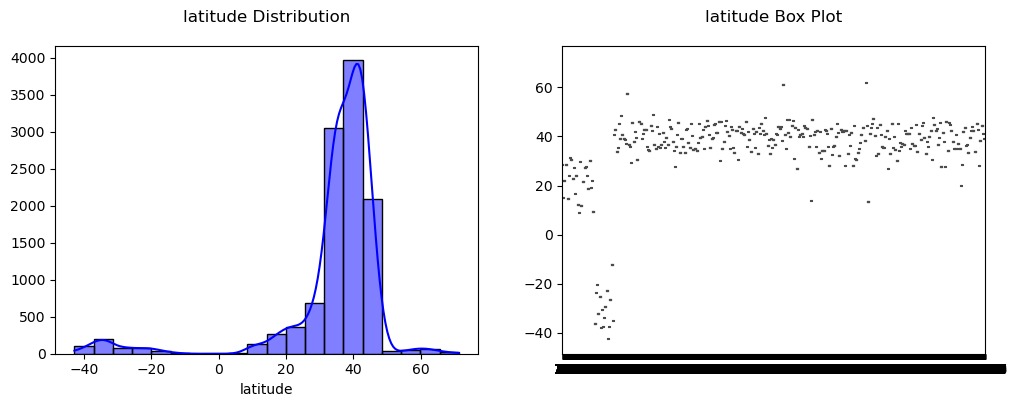

Skewness of latitude : -3.092274265273151


In [93]:
#Visualize (1) latitude
col = 'latitude'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='blue')
sns.boxplot(df[col], ax=axes[1], color='blue')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of latitude
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of 'latitude' is  skewed to the left. There are outliers present in the Box plot.

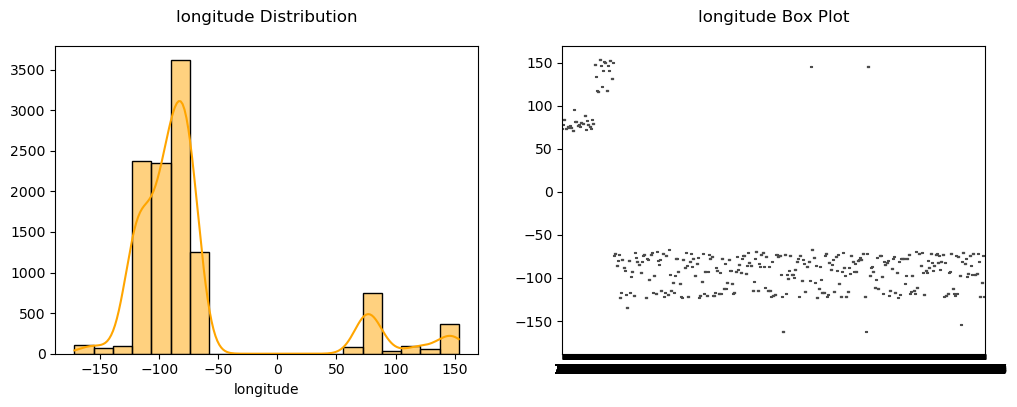

Skewness of longitude : 2.0979036789174517


In [94]:
#Visualize (2) longitude
col = 'longitude'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='orange')
sns.boxplot(df[col], ax=axes[1], color='orange')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of longitude
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of 'longitude' is skewed to the right. There are outliers present in the Box plot.

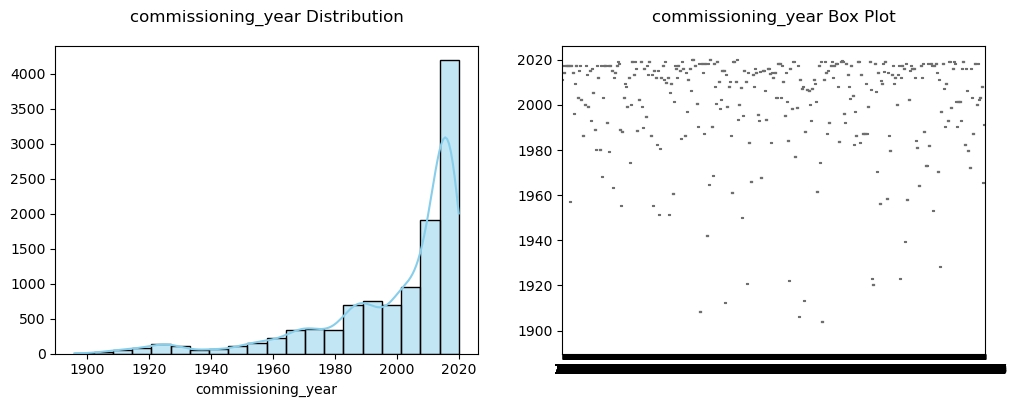

Skewness of commissioning_year : -1.739848226907857


In [95]:
#Visualize (3) commissioning_year
col = 'commissioning_year'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='skyblue')
sns.boxplot(df[col], ax=axes[1], color='skyblue')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of commissioning_year
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of 'commissioning_year' is skewed to the left. There are outliers present in the Box plot.

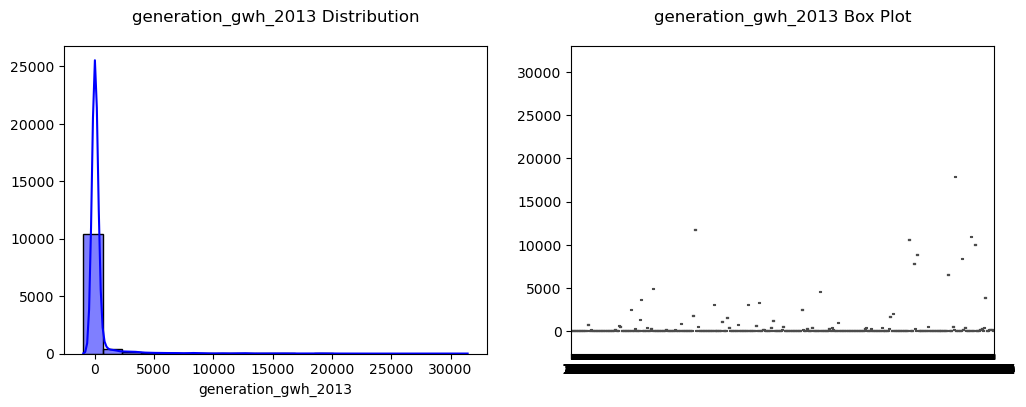

Skewness of generation_gwh_2013 : 8.050876641230664


In [96]:
#Visualize (4) generation_gwh_2013
col = 'generation_gwh_2013'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='blue')
sns.boxplot(df[col], ax=axes[1], color='blue')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of generation_gwh_2013
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of 'generation_gwh_2013' is skewed to the right. There are outliers present in the Box plot.

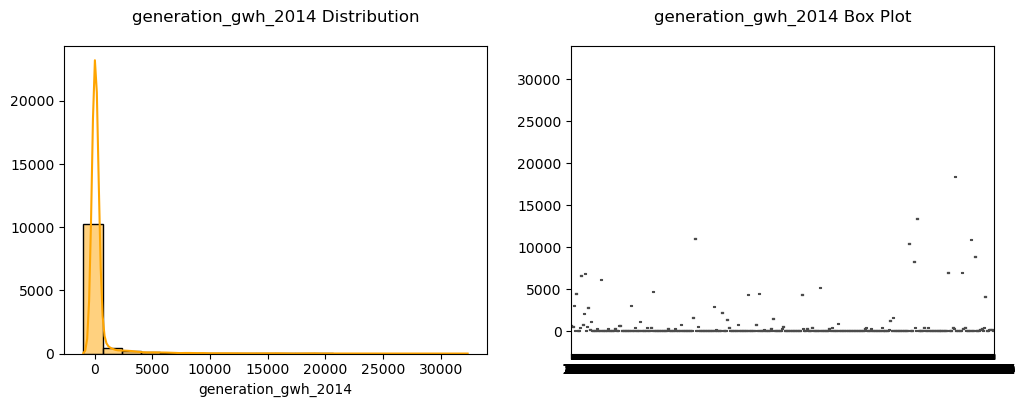

Skewness of generation_gwh_2014 : 7.5623784550223


In [97]:
#Visualize (5) generation_gwh_2014
col = 'generation_gwh_2014'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='orange')
sns.boxplot(df[col], ax=axes[1], color='orange')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of Total generation_gwh_2014
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of 'generation_gwh_2014' is skewed to the right. There are outliers present in the Box plot.

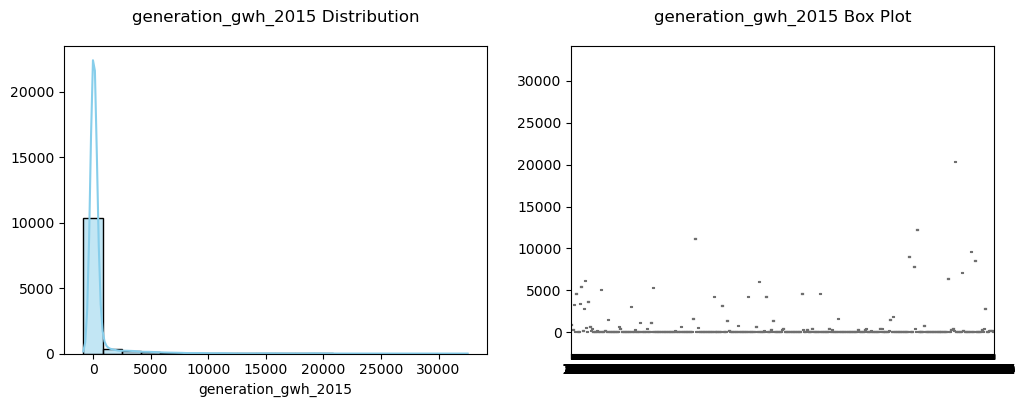

Skewness of generation_gwh_2015 : 7.669614504633128


In [98]:
#Visualize (6) generation_gwh_2015
col = 'generation_gwh_2015'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='skyblue')
sns.boxplot(df[col], ax=axes[1], color='skyblue')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of generation_gwh_2015
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of 'generation_gwh_2015' is skewed to the right. There are outliers present in the Box plot.

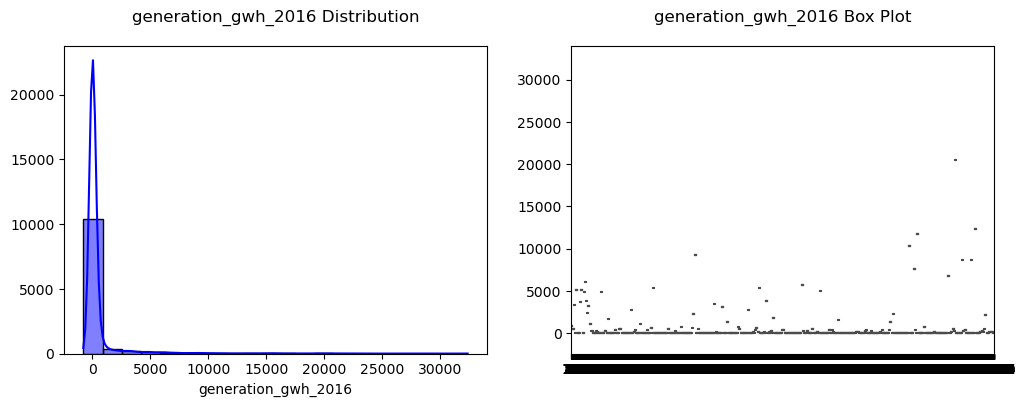

Skewness of generation_gwh_2016 : 7.7091574631744555


In [99]:
#Visualize (7) generation_gwh_2016
col = 'generation_gwh_2016'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='blue')
sns.boxplot(df[col], ax=axes[1], color='blue')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of generation_gwh_2016
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of 'generation_gwh_2016' is skewed to the right. There are outliers present in the Box plot.

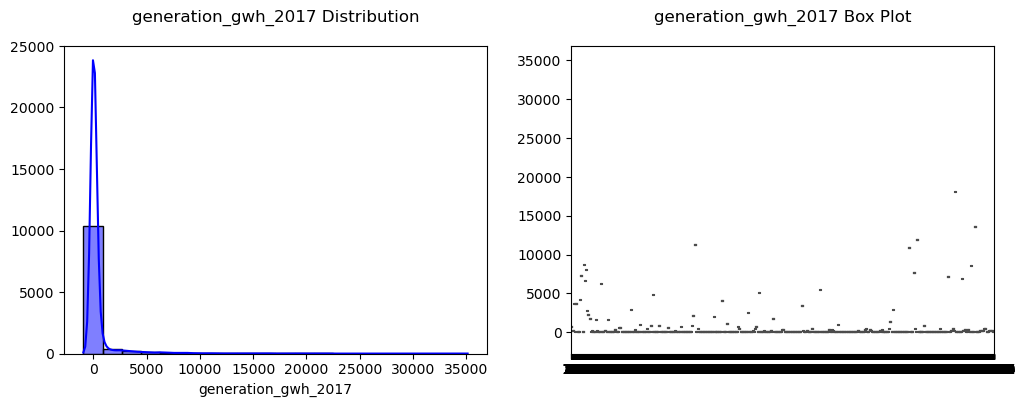

Skewness of generation_gwh_2017 : 7.776702202541704


In [100]:
#Visualize (8) generation_gwh_2017
col = 'generation_gwh_2017'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='blue')
sns.boxplot(df[col], ax=axes[1], color='blue')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of generation_gwh_2017
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of 'generation_gwh_2017' is skewed to the right. There are outliers present in the Box plot.

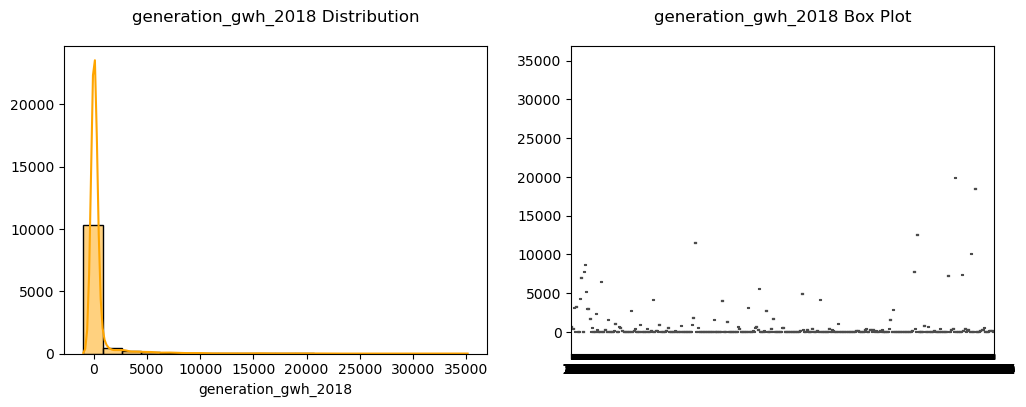

Skewness of generation_gwh_2018 : 7.66942874922549


In [101]:
#Visualize (9) generation_gwh_2018
col = 'generation_gwh_2018'
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df[col], kde=True , bins=20, ax=axes[0], color='orange')
sns.boxplot(df[col], ax=axes[1], color='orange')

axes[0].set_title(f'{col} Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title(f'{col} Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of generation_gwh_2018
print(f"Skewness of {col} : {df[col].skew()}")

The distribution of 'generation_gwh_2018' is skewed to the right. There are outliers present in the Box plot.

# 1.6.2 Bivariate Analysis

### 1.6.2.1 Capacity in mega-watts according to Primary Fuel

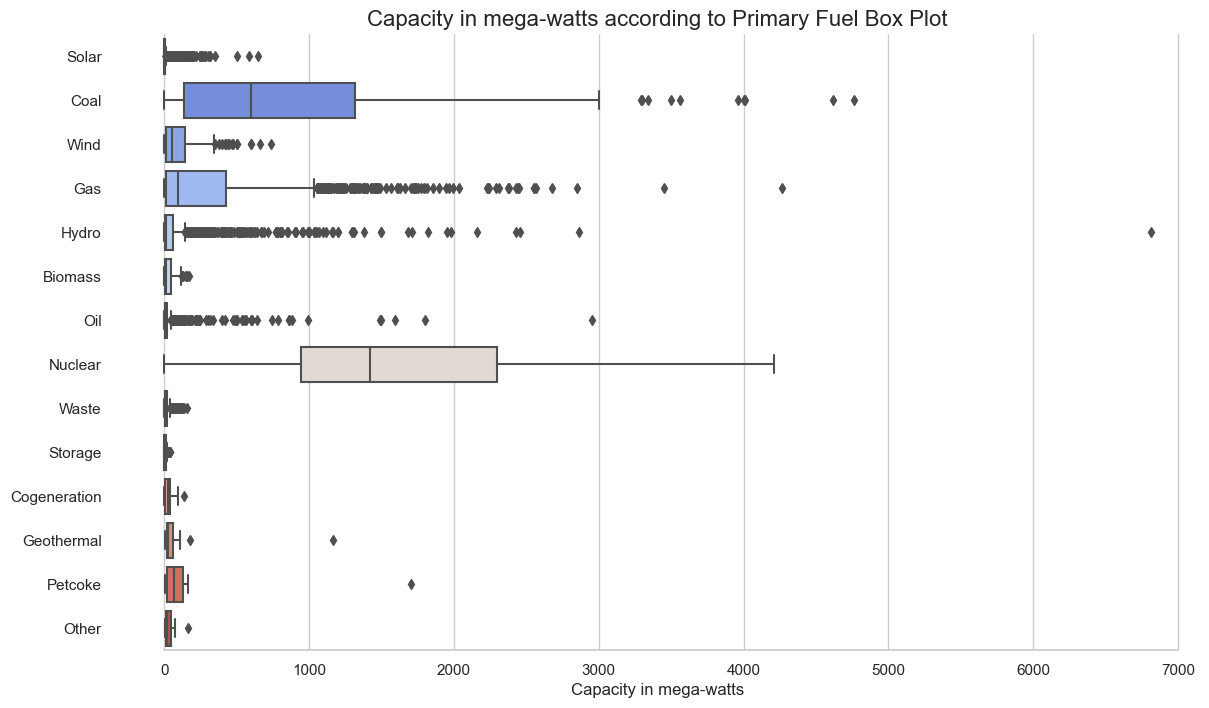

In [102]:
sns.set_theme(style="whitegrid")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(14, 8))

sns.boxplot( x='capacity_mw', y='primary_fuel', data= df, palette='coolwarm')

# visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="", xlabel='Capacity in mega-watts')
sns.despine(trim=True, left=True)

plt.title('Capacity in mega-watts according to Primary Fuel Box Plot', size=16, y=1)
plt.show()

The nuclear plants have the greatest energy production capacity and then come in order as follows coal, gas,wind,petcoke, hydro,biomass,geothermal cogeneration, oil,waste,storage,  solar, and other plants. Being Solar,oil,waste,storage plants the ones with the least capacity to produce energy.

### 1.6.2.2 Comparing the Capacity in mega-watts with the number of plants registered according to the primary fuel

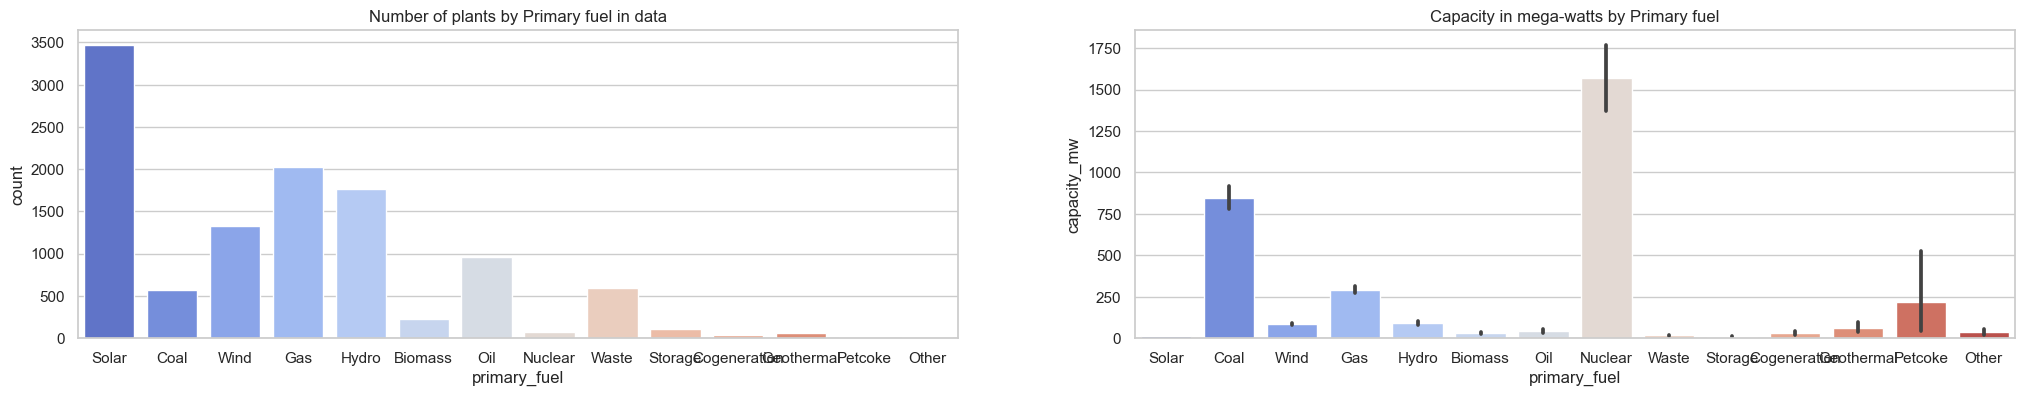

In [104]:
# Visualize the frequency of categorical target
fig, axs = plt.subplots(1, 2, figsize=(25, 4))

column = 'primary_fuel'
sns.countplot(data=df, x=column, ax=axs[0], palette='coolwarm')
axs[0].set_title(f"Number of plants by Primary fuel in data")

sns.barplot( y='capacity_mw', x='primary_fuel', data= df, palette='coolwarm');
axs[1].set_title(f"Capacity in mega-watts by Primary fuel")

plt.subplots_adjust(hspace=0.5)
plt.show()

There is a greater presence of Solar and Hydro plants and a minimal presence of other plants. However, nuclear plants are the ones with the greatest production capacity, followed by coal plants.

# 1.6.3 Multivariate Analysis

### 1.6.3.1 Pairplot

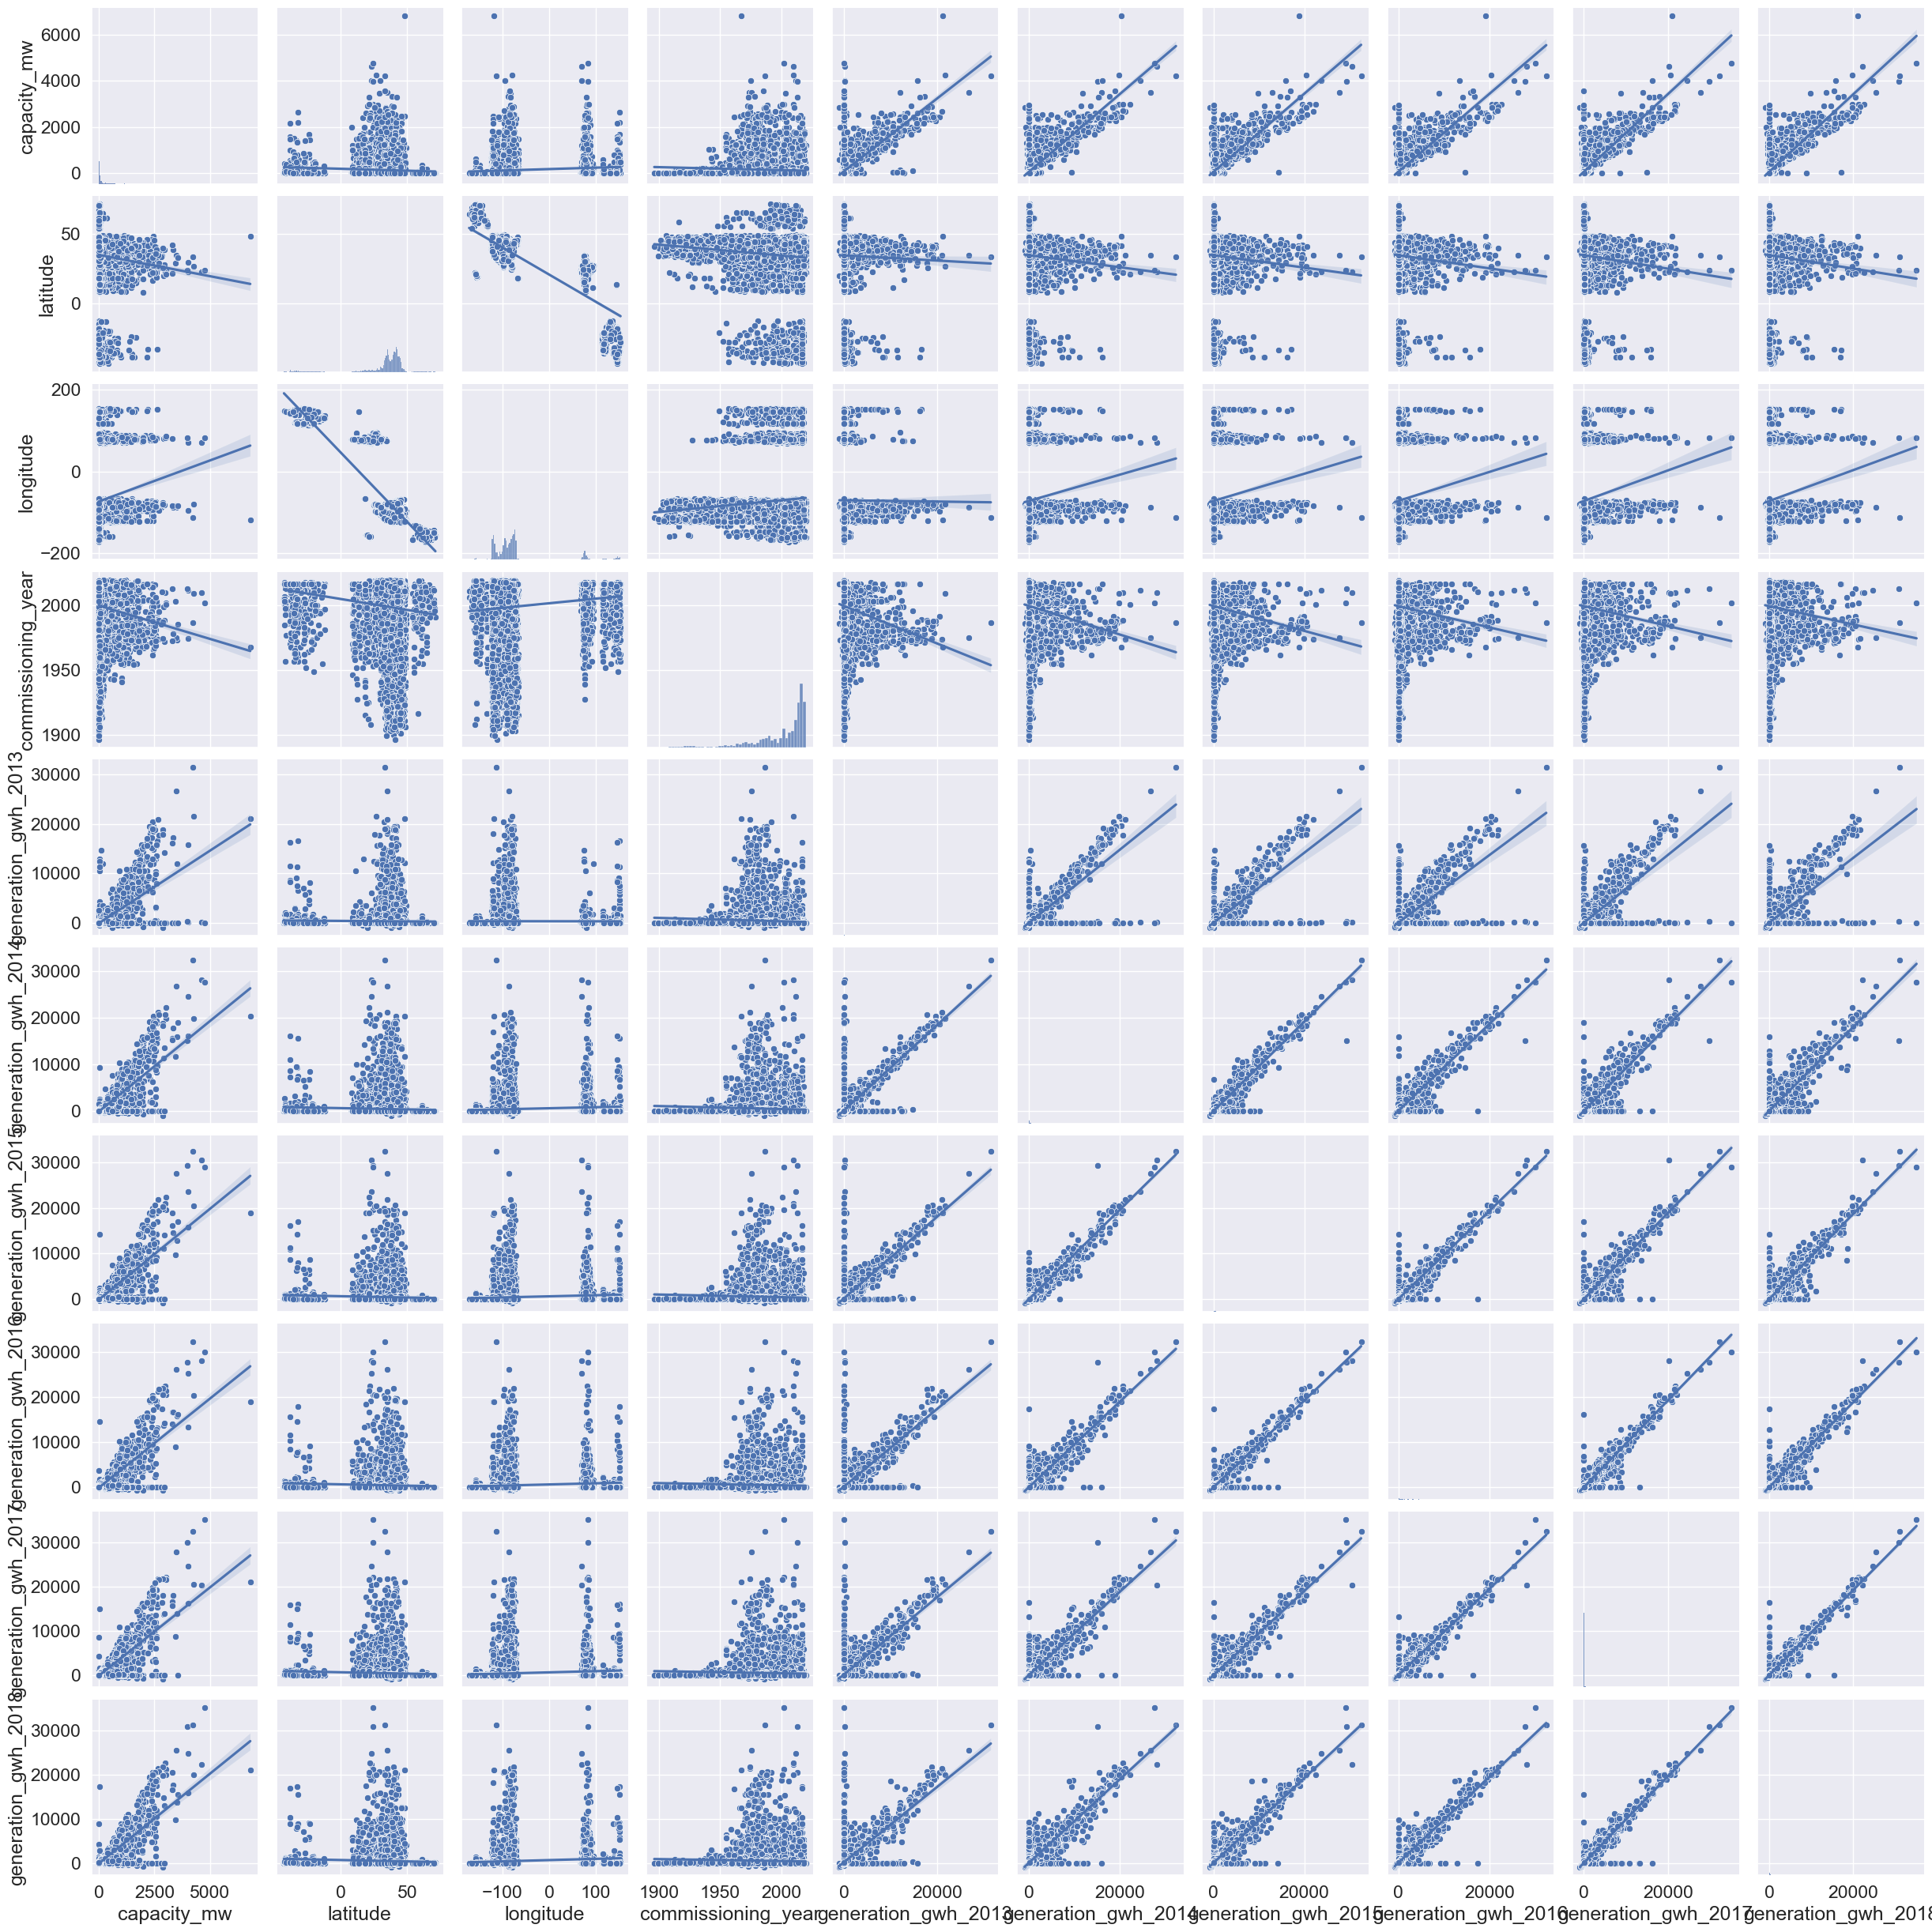

In [110]:
sns.set(font_scale=1.5)  
grid = sns.pairplot(df, palette = "coolwarm")

# Add a regression line for non-diagonal plots
for ax in grid.axes.flat[1:-1]: # first and last axes are not considered
    if ax.get_xlabel() != ax.get_ylabel():
        sns.regplot(data=df, x=ax.get_xlabel(), y=ax.get_ylabel(), scatter=False, ax=ax, color='b')

plt.show()

==>We can see that the capacity_mw variable has a strong positive relationship with the power generation variables which makes sense.

==>The generation_gwh variables have a positive relationship with each other.

### 1.6.3.2 Encoding categorical columns

In order to make the multivariate Analysis we need to encode the categorical features, for this purpose, we will use OrdinalEncoder.

In [65]:
# Encoding categorical columns using OrdinalEncoder 
from sklearn.preprocessing import OrdinalEncoder
# Initialize the OrdinalEncoder
OE = OrdinalEncoder()

category_mappings = {}

for col in (categorical_col + ['primary_fuel']):
    # Fit and transform the column
    df[col] = OE.fit_transform(df[col].values.reshape(-1, 1))
    # Store the category mappings 
    category_mappings[col] = OE.categories_[0].tolist()

display(df.head())
display(df.tail())

capacity_mw  latitude  longitude  primary_fuel  commissioning_year  source  \
0          2.5   28.1839    73.2407          10.0              2011.0   116.0   
1         98.0   24.7663    74.6090           1.0              2017.0   188.0   
2         39.2   21.9038    69.3732          13.0              2017.0    22.0   
3        135.0   23.8712    91.3602           3.0              2004.0    24.0   
4       1800.0   21.9603    82.4091           1.0              2015.0    24.0   

     url  geolocation_source  generation_gwh_2013  generation_gwh_2014  \
0  134.0                 2.0             21.38450            22.241000   
1  188.0                 4.0             21.38450            22.241000   
2  216.0                 4.0             21.38450            22.241000   
3   60.0                 4.0              2.41461           617.789264   
4   60.0                 4.0             21.38450          3035.550000   

   generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0               19.504            15.410278            13.433861   
1               19.504            15.410278            13.433861   
2               19.504            15.410278            13.433861   
3              843.747           886.004428           663.774500   
4             5916.370          6243.000000          5385.579736   

   generation_gwh_2018  
0            12.308500  
1            12.308500  
2            12.308500  
3           626.239128  
4          7279.000000

capacity_mw  latitude  longitude  primary_fuel  commissioning_year  \
11872          7.0   42.4803   -87.8861          12.0          2003.00000   
11873         18.0   38.2803   -85.7023           3.0          1969.00000   
11874          3.4   42.8869   -76.9683          13.0          2012.00000   
11875          1.0   44.3195   -92.6703          10.0          2018.00000   
11878          9.8   40.5606  -112.0478           3.0          2013.77551   

       source   url  geolocation_source  generation_gwh_2013  \
11872   185.0  68.0                 3.0              43.5920   
11873   185.0  68.0                 3.0               0.2030   
11874   185.0  68.0                 3.0               3.6710   
11875   185.0  68.0                 3.0              21.3845   
11878   185.0  68.0                 3.0              12.9680   

       generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
11872             49.13400               46.699            42.480000   
11873              0.07800                1.058             0.062000   
11874              2.46015                2.489             1.670000   
11875             22.24100               19.504            15.410278   
11878             51.27600               71.505            76.392000   

       generation_gwh_2017  generation_gwh_2018  
11872            38.669000               30.495  
11873             0.015000               -0.073  
11874             1.233490                2.630  
11875            13.433861                1.161  
11878            76.631000               75.228

### 1.6.3.3 Correlation between AveragePrice and Region with independent variables

In [66]:
# Calculate the correlation between features
cor = df.corr()
cor

capacity_mw  latitude  longitude  primary_fuel  \
capacity_mw             1.000000 -0.070684   0.111050     -0.341491   
latitude               -0.070684  1.000000  -0.807770      0.082361   
longitude               0.111050 -0.807770   1.000000     -0.140335   
primary_fuel           -0.341491  0.082361  -0.140335      1.000000   
commissioning_year     -0.081280 -0.114581   0.101181      0.418739   
source                 -0.133009  0.793550  -0.925448      0.155559   
url                    -0.024984 -0.858377   0.718277      0.006931   
geolocation_source      0.078945  0.708400  -0.452773     -0.058621   
generation_gwh_2013     0.681491 -0.018604  -0.003723     -0.199769   
generation_gwh_2014     0.807876 -0.047952   0.085269     -0.238384   
generation_gwh_2015     0.821501 -0.050016   0.089410     -0.244265   
generation_gwh_2016     0.818729 -0.053063   0.095304     -0.236927   
generation_gwh_2017     0.817685 -0.054511   0.100708     -0.234085   
generation_gwh_2018     0.824140 -0.054615   0.102764     -0.236114   

                     commissioning_year    source       url  \
capacity_mw                   -0.081280 -0.133009 -0.024984   
latitude                      -0.114581  0.793550 -0.858377   
longitude                      0.101181 -0.925448  0.718277   
primary_fuel                   0.418739  0.155559  0.006931   
commissioning_year             1.000000 -0.079838  0.091649   
source                        -0.079838  1.000000 -0.675775   
url                            0.091649 -0.675775  1.000000   
geolocation_source            -0.062133  0.365881 -0.784269   
generation_gwh_2013           -0.099167  0.012920  0.000780   
generation_gwh_2014           -0.083904 -0.100608 -0.017890   
generation_gwh_2015           -0.073845 -0.105576 -0.018974   
generation_gwh_2016           -0.063136 -0.113121 -0.019339   
generation_gwh_2017           -0.059117 -0.119682 -0.019356   
generation_gwh_2018           -0.055052 -0.122354 -0.021426   

                     geolocation_source  generation_gwh_2013  \
capacity_mw                    0.078945             0.681491   
latitude                       0.708400            -0.018604   
longitude                     -0.452773            -0.003723   
primary_fuel                  -0.058621            -0.199769   
commissioning_year            -0.062133            -0.099167   
source                         0.365881             0.012920   
url                           -0.784269             0.000780   
geolocation_source             1.000000            -0.007164   
generation_gwh_2013           -0.007164             1.000000   
generation_gwh_2014            0.053323             0.824721   
generation_gwh_2015            0.056273             0.799031   
generation_gwh_2016            0.058730             0.770386   
generation_gwh_2017            0.061166             0.774084   
generation_gwh_2018            0.064770             0.747347   

                     generation_gwh_2014  generation_gwh_2015  \
capacity_mw                     0.807876             0.821501   
latitude                       -0.047952            -0.050016   
longitude                       0.085269             0.089410   
primary_fuel                   -0.238384            -0.244265   
commissioning_year             -0.083904            -0.073845   
source                         -0.100608            -0.105576   
url                            -0.017890            -0.018974   
geolocation_source              0.053323             0.056273   
generation_gwh_2013             0.824721             0.799031   
generation_gwh_2014             1.000000             0.970653   
generation_gwh_2015             0.970653             1.000000   
generation_gwh_2016             0.942709             0.967456   
generation_gwh_2017             0.925835             0.946991   
generation_gwh_2018             0.920209             0.945982   

                     generation_gwh_2016  generation_gwh_2017  \
capacit

In [67]:
# Listing the correlation coeficients with the target variable (Regression model)
corr_df = cor.unstack().sort_values(ascending=False).reset_index()
corr_df.columns = ['Feature A', 'Feature B', 'Corr coef']
corr_df[(corr_df['Feature A'] == 'capacity_mw') &  (corr_df['Feature B'] != 'capacity_mw')]

Feature A            Feature B  Corr coef
36   capacity_mw  generation_gwh_2018   0.824140
38   capacity_mw  generation_gwh_2015   0.821501
40   capacity_mw  generation_gwh_2016   0.818729
42   capacity_mw  generation_gwh_2017   0.817685
45   capacity_mw  generation_gwh_2014   0.807876
60   capacity_mw  generation_gwh_2013   0.681491
69   capacity_mw            longitude   0.111050
86   capacity_mw   geolocation_source   0.078945
120  capacity_mw                  url  -0.024984
143  capacity_mw             latitude  -0.070684
149  capacity_mw   commissioning_year  -0.081280
167  capacity_mw               source  -0.133009
182  capacity_mw         primary_fuel  -0.341491

Here is the list of the correlation coefficients with the target variable capacity_mw. There is a strong positive relation between the target variable capacity_mw and the generation_gwh columns, a weak positive relation with geolocation_source and longitude, and a negative medium correlation with primary_fuel.

In [68]:
# Listing the correlation coeficients with the target variable (Classification model)
corr_df = cor.unstack().sort_values(ascending=False).reset_index()
corr_df.columns = ['Feature A', 'Feature B', 'Corr coef']
corr_df[(corr_df['Feature A'] == 'primary_fuel') & (corr_df['Feature B'] != 'primary_fuel')]

Feature A            Feature B  Corr coef
63   primary_fuel   commissioning_year   0.418739
67   primary_fuel               source   0.155559
84   primary_fuel             latitude   0.082361
100  primary_fuel                  url   0.006931
134  primary_fuel   geolocation_source  -0.058621
169  primary_fuel            longitude  -0.140335
170  primary_fuel  generation_gwh_2013  -0.199769
173  primary_fuel  generation_gwh_2017  -0.234085
175  primary_fuel  generation_gwh_2018  -0.236114
176  primary_fuel  generation_gwh_2016  -0.236927
178  primary_fuel  generation_gwh_2014  -0.238384
180  primary_fuel  generation_gwh_2015  -0.244265
183  primary_fuel          capacity_mw  -0.341491

The primary_fuel variable has a medium positive correlation with commissioning_year, and a weak one with source. Also, is negatively correlated with geolocation_source, longitude,generation_gwh columns andcapacity_mw.

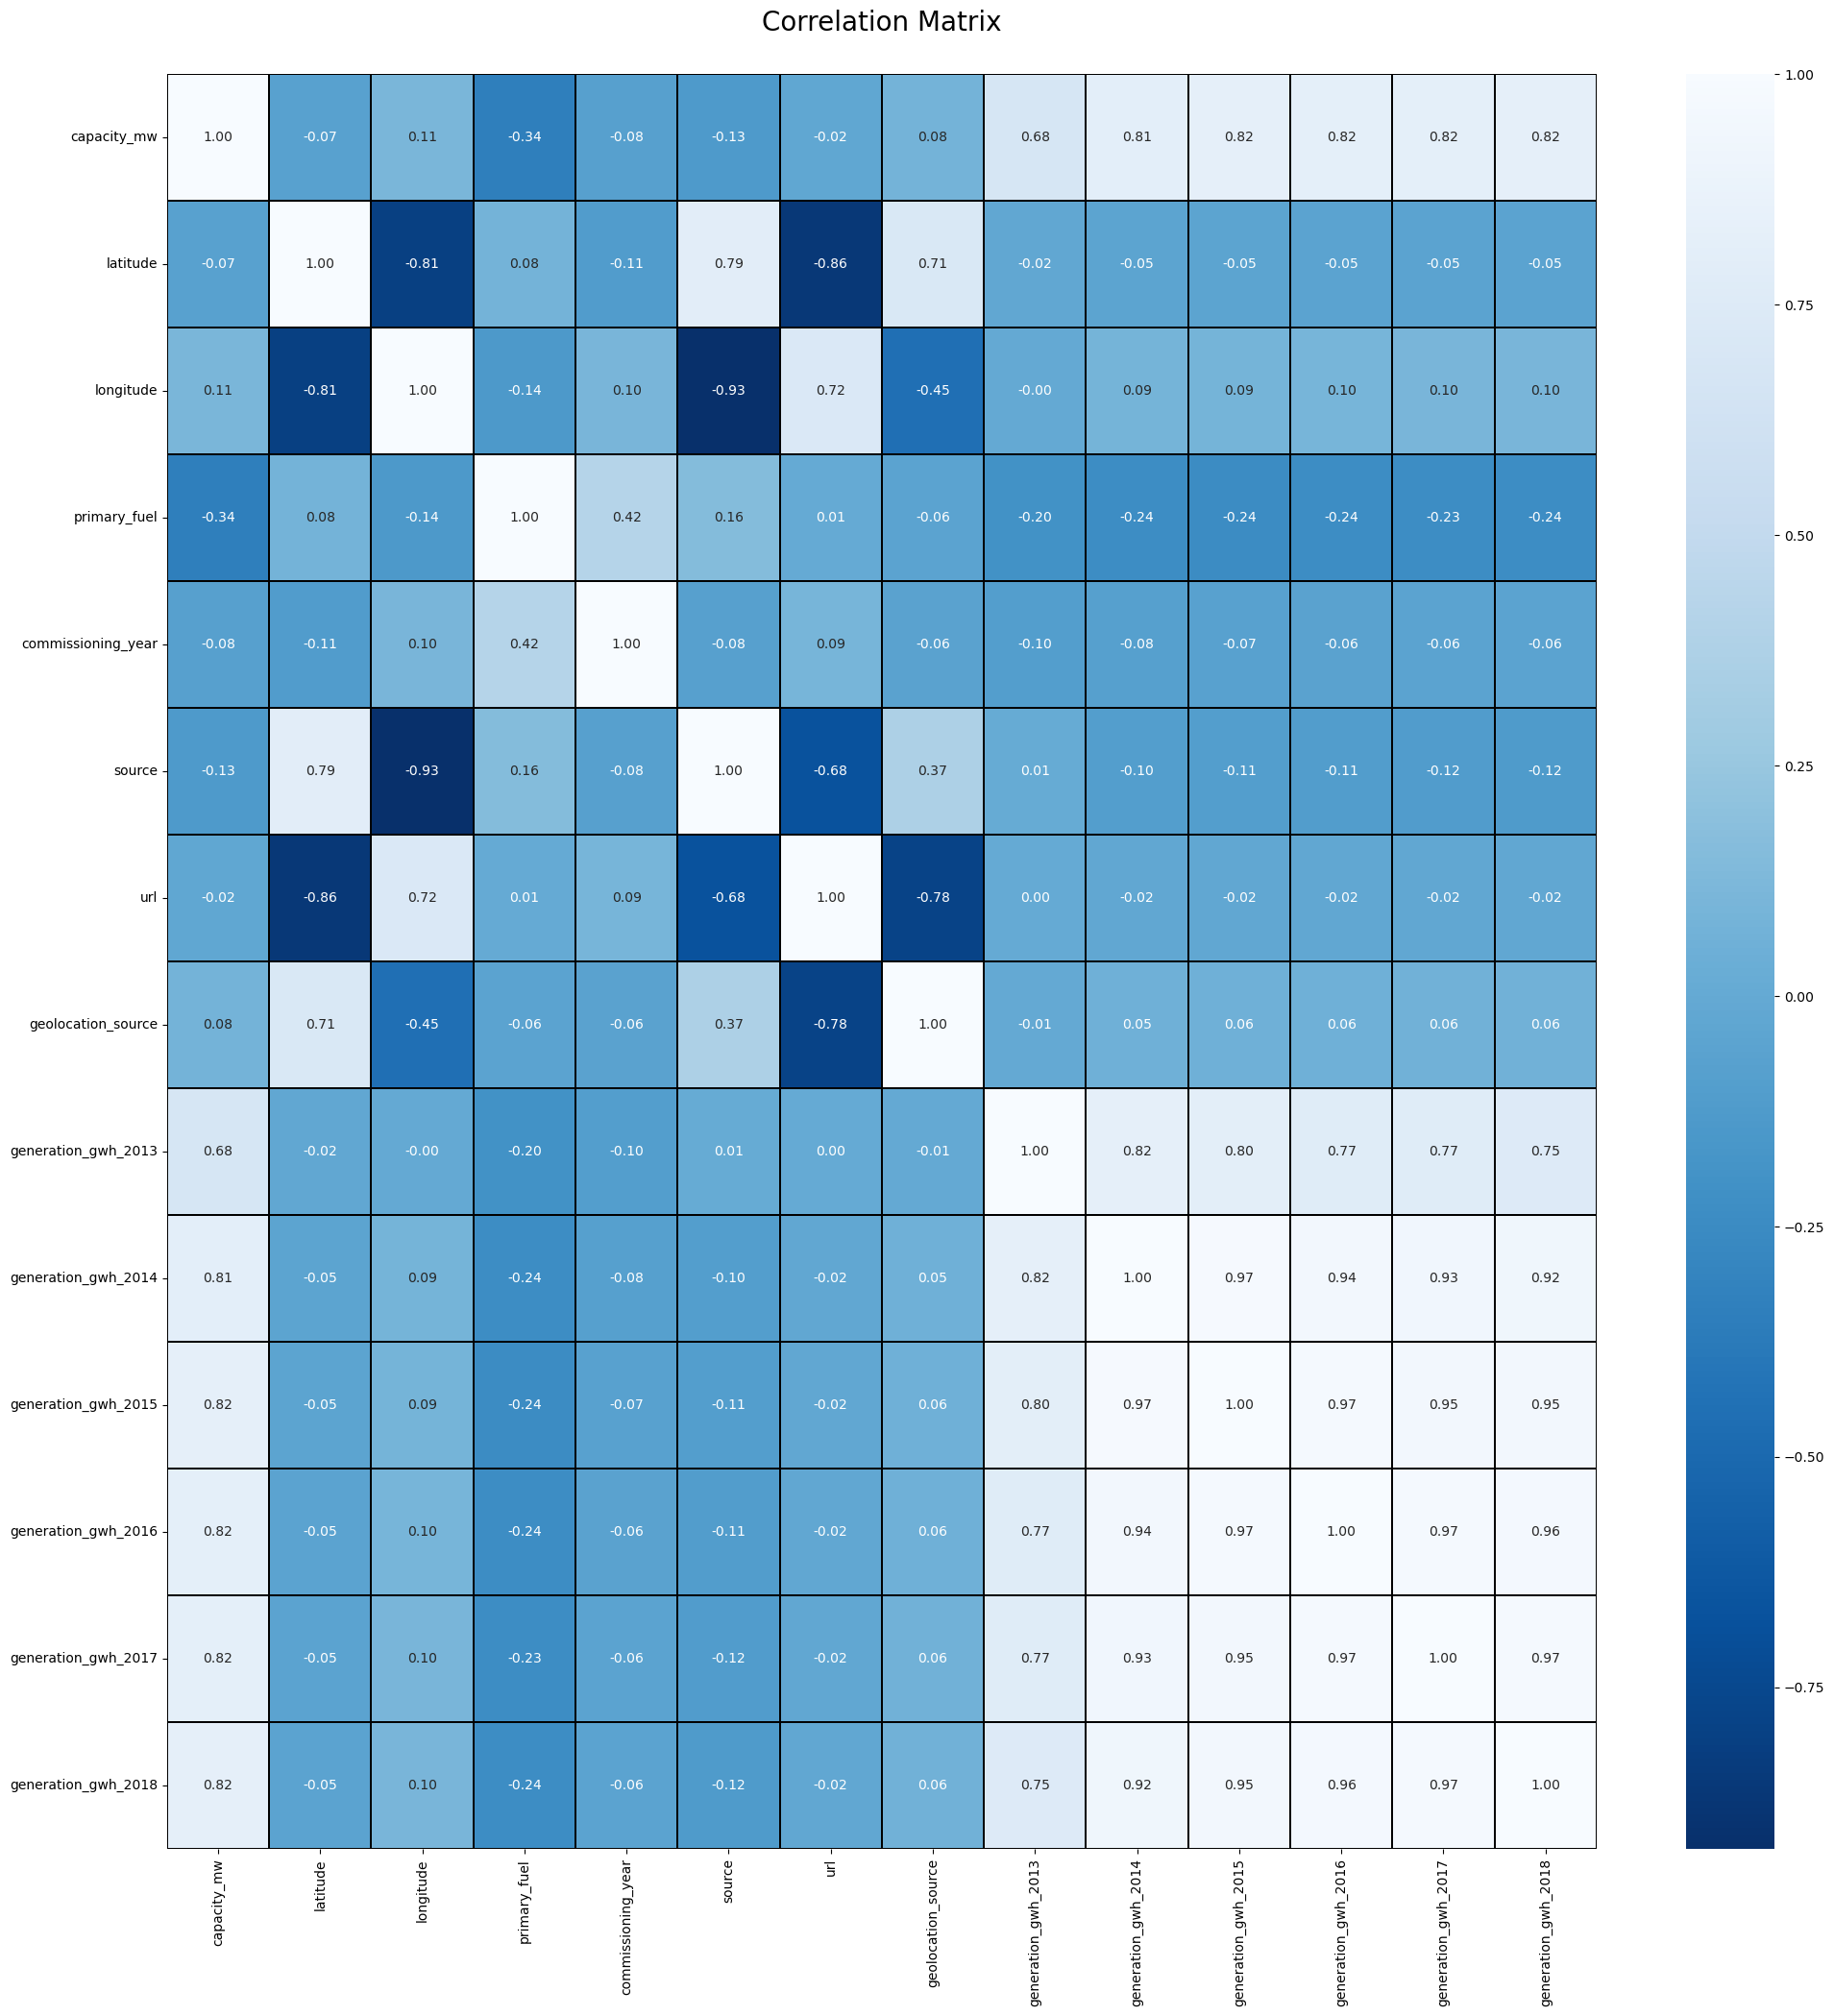

In [69]:
# Visualizing the correlation matrix by plotting heatmap
plt.figure(figsize=(24, 24))
sns.heatmap(cor, linewidths = 0.1, fmt = ".2f", linecolor = 'black', cmap='Blues_r', annot=True)
plt.yticks(rotation = 0)
plt.title('Correlation Matrix', size=20, y=1.02)
plt.show()

**=>0-no relation**

**==>-0.3 to 0.3 less relation**

**==>greater than -0.5 or 0.5 greater than(moderate correlation)**

**==>greater than -0.7 or 0.7 greater than(high correlation)**


**1)From above heatmap we can see,there are positive correlation and negative correlation between label and feature columns**

**2)The capacity_mw feature has more correlation with the power generation columns(+0.82) and is negatively correlated with primary_fuel column(-0.34)**

**3)The primary_fuel feature is slightly correlated with commisioning_year(0.42) and capacity_mw(-0.34).**

**4)The columns 'generation_gwh_2013',generation_gwh_2014', 'generation_gwh_2015','generation_gwh_2016', 'generation_gwh_2017', and 'generation_gwh_2018' are highly correlated with each other.**


# 2. Preprocessing Data

### 2.1 Missing values

In [70]:
df.isnull().sum().sum()

0

No missing values to remove.

### 2.2 Removing outliers

In [71]:
# Detect outliers with zscore method
from scipy.stats import zscore

z = np.abs(zscore(df))
z

capacity_mw  latitude  longitude  primary_fuel  commissioning_year  \
0         0.365374  0.389913   2.135877      0.671155            0.495709   
1         0.109710  0.602001   2.156229      1.668890            0.748339   
2         0.267124  0.779642   2.078353      1.451171            0.748339   
3         0.010657  0.657549   2.405384      1.148880            0.200973   
4         4.446729  0.776136   2.272246      1.668890            0.664129   
...            ...       ...        ...           ...                 ...   
11872     0.353327  0.497290   0.260695      1.191166            0.158868   
11873     0.323879  0.236648   0.228214      1.148880            1.272704   
11874     0.362965  0.522523   0.098306      1.451171            0.537814   
11875     0.369390  0.611427   0.331855      0.671155            0.790444   
11878     0.345831  0.378158   0.620072      1.148880            0.612572   

         source       url  geolocation_source  generation_gwh_2013  \
0      0.970633  0.988395            1.270752             0.204951   
1      0.420213  1.996986            1.518401             0.204951   
2      2.786461  2.519960            1.518401             0.204951   
3      2.747826  0.393749            1.518401             0.216729   
4      2.747826  0.393749            1.518401             0.204951   
...         ...       ...                 ...                  ...   
11872  0.362262  0.244328            0.123824             0.191163   
11873  0.362262  0.244328            0.123824             0.218102   
11874  0.362262  0.244328            0.123824             0.215949   
11875  0.362262  0.244328            0.123824             0.204951   
11878  0.362262  0.244328            0.123824             0.210177   

       generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0                 0.221678             0.228150             0.229493   
1                 0.221678             0.228150             0.229493   
2                 0.221678             0.228150             0.229493   
3                 0.110228             0.225480             0.252094   
4                 1.457677             3.017249             3.215423   
...                    ...                  ...                  ...   
11872             0.206690             0.213183             0.214519   
11873             0.234030             0.238302             0.237983   
11874             0.232702             0.237515             0.237094   
11875             0.221678             0.228150             0.229493   
11878             0.205497             0.199531             0.195760   

       generation_gwh_2017  generation_gwh_2018  
0                 0.232032             0.236797  
1                 0.232032             0.236797  
2                 0.232032             0.236797  
3                 0.125523             0.096901  
4                 2.721555             3.712962  
...                    ...                  ...  
11872             0.218158             0.226912  
11873             0.239410             0.243527  
11874             0.238740             0.242057  
11875             0.232032             0.242856  
11878             0.197287             0.202597  

[11240 rows x 14 columns]

In [72]:
# threshold = 3
df_new = df[(z<3).all(axis=1)]

print(f"{df.shape[0] - df_new.shape[0]} rows with outliers were deleted.")
print(f"This represent {round((df.shape[0] - df_new.shape[0]) / df.shape[0] *100, 2)}% of the data.")
print(f"In the new dataset there are {df_new.shape[0]} rows and {df.shape[1]} columns.")
df = df_new.copy()
df

1319 rows with outliers were deleted.
This represent 11.73% of the data.
In the new dataset there are 9921 rows and 14 columns.


capacity_mw  latitude  longitude  primary_fuel  commissioning_year  \
0              2.5   28.1839    73.2407          10.0          2011.00000   
1             98.0   24.7663    74.6090           1.0          2017.00000   
2             39.2   21.9038    69.3732          13.0          2017.00000   
3            135.0   23.8712    91.3602           3.0          2004.00000   
5            250.0   23.7689    68.6447           1.0          2005.00000   
...            ...       ...        ...           ...                 ...   
11872          7.0   42.4803   -87.8861          12.0          2003.00000   
11873         18.0   38.2803   -85.7023           3.0          1969.00000   
11874          3.4   42.8869   -76.9683          13.0          2012.00000   
11875          1.0   44.3195   -92.6703          10.0          2018.00000   
11878          9.8   40.5606  -112.0478           3.0          2013.77551   

       source    url  geolocation_source  generation_gwh_2013  \
0       116.0  134.0                 2.0             21.38450   
1       188.0  188.0                 4.0             21.38450   
2        22.0  216.0                 4.0             21.38450   
3        24.0   60.0                 4.0              2.41461   
5        24.0   60.0                 4.0              1.52800   
...       ...    ...                 ...                  ...   
11872   185.0   68.0                 3.0             43.59200   
11873   185.0   68.0                 3.0              0.20300   
11874   185.0   68.0                 3.0              3.67100   
11875   185.0   68.0                 3.0             21.38450   
11878   185.0   68.0                 3.0             12.96800   

       generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0                22.241000               19.504            15.410278   
1                22.241000               19.504            15.410278   
2                22.241000               19.504            15.410278   
3               617.789264              843.747           886.004428   
5              1153.421000             1208.852          1175.765000   
...                    ...                  ...                  ...   
11872            49.134000               46.699            42.480000   
11873             0.078000                1.058             0.062000   
11874             2.460150                2.489             1.670000   
11875            22.241000               19.504            15.410278   
11878            51.276000               71.505            76.392000   

       generation_gwh_2017  generation_gwh_2018  
0                13.433861            12.308500  
1                13.433861            12.308500  
2                13.433861            12.308500  
3               663.774500           626.239128  
5              1147.913000           976.655000  
...                    ...                  ...  
11872            38.669000            30.495000  
11873             0.015000            -0.073000  
11874             1.233490             2.630000  
11875            13.433861             1.161000  
11878            76.631000            75.228000  

[9921 rows x 14 columns]

### 2.4 Skewness Correction

In [73]:
# Checking the skewness in the data
df_skew = df.skew().sort_values(ascending=False).to_frame("Skew")
df_skew

Skew
url                  7.123767
generation_gwh_2013  5.652719
generation_gwh_2016  5.308090
generation_gwh_2014  5.298898
generation_gwh_2015  5.181274
generation_gwh_2017  5.175323
generation_gwh_2018  5.028757
capacity_mw          3.345180
longitude            2.532131
primary_fuel        -0.274581
latitude            -0.686715
geolocation_source  -1.122168
commissioning_year  -1.490924
source              -3.802068

**Skewness acceptable range -0.5 to +0.5**

In [74]:
# Subsetting the features with a skew > 0.5
skew_columns = df_skew[df_skew['Skew'] > 0.5].index.to_list()
skew_columns = sorted(skew_columns)
skew_columns

['capacity_mw',
 'generation_gwh_2013',
 'generation_gwh_2014',
 'generation_gwh_2015',
 'generation_gwh_2016',
 'generation_gwh_2017',
 'generation_gwh_2018',
 'longitude',
 'url']

We are going to use the cube-root method, square-root method, and log method to transform the columns with a skewness of more than 0.5. Later, we will compare the resulting skewness in order to select the best transform method.

In [75]:
# The categorical variables will not be taken into account, nor longitude.
skew_columns.remove('url')
skew_columns.remove('longitude')

In [76]:
# Checking skewness using cuberoot method and log method
df_transformed = pd.DataFrame()

for col in skew_columns:
    df_transformed[f"{col}_cbrt"] = np.cbrt(df[col])
    df_transformed[f"{col}_sqrt"] = np.sqrt(df[col])
    df_transformed[f"{col}_log"] = np.log(df[col])
    
# Adding the other columns
df_transformed = pd.concat([df_transformed, df[skew_columns]], axis=1)

In [77]:
df_transformed.skew().sort_index(ascending=False).to_frame("Skewness") #comparing which transform method gives best result

Skewness
generation_gwh_2018_sqrt  2.763407
generation_gwh_2018_log        NaN
generation_gwh_2018_cbrt  1.735854
generation_gwh_2018       5.028757
generation_gwh_2017_sqrt  2.849597
generation_gwh_2017_log        NaN
generation_gwh_2017_cbrt  1.780029
generation_gwh_2017       5.175323
generation_gwh_2016_sqrt  2.947346
generation_gwh_2016_log        NaN
generation_gwh_2016_cbrt  1.835467
generation_gwh_2016       5.308090
generation_gwh_2015_sqrt  3.046268
generation_gwh_2015_log        NaN
generation_gwh_2015_cbrt  1.927335
generation_gwh_2015       5.181274
generation_gwh_2014_sqrt  3.084898
generation_gwh_2014_log        NaN
generation_gwh_2014_cbrt  1.922022
generation_gwh_2014       5.298898
generation_gwh_2013_sqrt  3.291888
generation_gwh_2013_log        NaN
generation_gwh_2013_cbrt  1.997656
generation_gwh_2013       5.652719
capacity_mw_sqrt          1.948635
capacity_mw_log                NaN
capacity_mw_cbrt          1.434401
capacity_mw               3.345180

For each skewness column, we obtain the better transform method. We can observe that for columns capacity_mw, generation_gwh_2013,generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017, and generation_gwh_2018 is better to apply the cube-root transform method.

In [78]:
# Selecting columns to apply cube-root transform method
cbrt_columns = ['generation_gwh_2013','generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']
print(cbrt_columns)

# Update the df dataset with the transfor data with cube-root method.
for col in cbrt_columns:
    df[col] = np.cbrt(df[col])

['generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']


In [79]:
# Transform the capacity_mw column
df['capacity_mw_cat'] = np.cbrt(df['capacity_mw'])

The transformation to the capacity mw column will be stored in a different column in order to only be considered in the classification model since this is the target variable in the regression model.

In [80]:
# This is the new skewness for the transformed columns
skew_columns.remove('capacity_mw')
skew_columns = skew_columns + ['capacity_mw_cat']
df[skew_columns].skew()

generation_gwh_2013    1.997656
generation_gwh_2014    1.922022
generation_gwh_2015    1.927335
generation_gwh_2016    1.835467
generation_gwh_2017    1.780029
generation_gwh_2018    1.735854
capacity_mw_cat        1.434401
dtype: float64

After update the df dataset with the transform data with cube-root method, we can continue with the analysis.

### 2.5 Feature Scaling using Standard Scalarization

### 2.5.1 Separating features and label

### 2.5.1.1 Separating features for regression model to predict capacity in mega-watts

In [81]:
# Separating the independent and target variables into x and y 
col = ['capacity_mw', 'capacity_mw_cat'] #capacity_mw_cat variable -> classification model
x = df.drop(col, axis=1)
y = df['capacity_mw']

print(f"Feature Dimension = {x.shape}")
print(f"Label Dimension = {y.shape}")
display(x.head())
display(y.head())

Feature Dimension = (9921, 13)
Label Dimension = (9921,)


latitude  longitude  primary_fuel  commissioning_year  source    url  \
0   28.1839    73.2407          10.0              2011.0   116.0  134.0   
1   24.7663    74.6090           1.0              2017.0   188.0  188.0   
2   21.9038    69.3732          13.0              2017.0    22.0  216.0   
3   23.8712    91.3602           3.0              2004.0    24.0   60.0   
5   23.7689    68.6447           1.0              2005.0    24.0   60.0   

   geolocation_source  generation_gwh_2013  generation_gwh_2014  \
0                 2.0             2.775661             2.812234   
1                 4.0             2.775661             2.812234   
2                 4.0             2.775661             2.812234   
3                 4.0             1.341577             8.516872   
5                 4.0             1.151793            10.487274   

   generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0             2.691790             2.488495             2.377207   
1             2.691790             2.488495             2.377207   
2             2.691790             2.488495             2.377207   
3             9.449397             9.604586             8.723154   
5            10.652651            10.554561            10.470554   

   generation_gwh_2018  
0             2.308882  
1             2.308882  
2             2.308882  
3             8.555526  
5             9.921570

0      2.5
1     98.0
2     39.2
3    135.0
5    250.0
Name: capacity_mw, dtype: float64

### 2.5.1.2 Separating features for classification model to predict Primary fuel

In [82]:
# Separating the independent and target variables into x and y 
col = ['primary_fuel', 'capacity_mw'] #capacity_mw is represented by capacity_mw_cat
x2 = df.drop(col, axis=1)
y2 = df['primary_fuel']

print(f"Feature Dimension = {x2.shape}")
print(f"Label Dimension = {y2.shape}")
display(x2.head())
display(y2.unique())

Feature Dimension = (9921, 13)
Label Dimension = (9921,)


latitude  longitude  commissioning_year  source    url  geolocation_source  \
0   28.1839    73.2407              2011.0   116.0  134.0                 2.0   
1   24.7663    74.6090              2017.0   188.0  188.0                 4.0   
2   21.9038    69.3732              2017.0    22.0  216.0                 4.0   
3   23.8712    91.3602              2004.0    24.0   60.0                 4.0   
5   23.7689    68.6447              2005.0    24.0   60.0                 4.0   

   generation_gwh_2013  generation_gwh_2014  generation_gwh_2015  \
0             2.775661             2.812234             2.691790   
1             2.775661             2.812234             2.691790   
2             2.775661             2.812234             2.691790   
3             1.341577             8.516872             9.449397   
5             1.151793            10.487274            10.652651   

   generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  \
0             2.488495             2.377207             2.308882   
1             2.488495             2.377207             2.308882   
2             2.488495             2.377207             2.308882   
3             9.604586             8.723154             8.555526   
5            10.554561            10.470554             9.921570   

   capacity_mw_cat  
0         1.357209  
1         4.610436  
2         3.396999  
3         5.129928  
5         6.299605

array([10.,  1., 13.,  3.,  5.,  0.,  7.,  6., 12., 11.,  2.,  4.,  9.,
        8.])

# 2.5.2 Scaling

### 2.5.2.1 Scaling the data for regression model

In [83]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Scaling data 
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

print(f"\n\n{'*'*30} x features for regression model {'*'*30}")
display(x.head())



****************************** x features for regression model ******************************


latitude  longitude  primary_fuel  commissioning_year    source       url  \
0 -1.331105   3.326501      0.610417            0.473189 -1.649009  4.259188   
1 -1.803247   3.355661     -1.774439            0.779364  0.338278  7.808085   
2 -2.198701   3.244079      1.405369            0.779364 -4.243522  9.648254   
3 -1.926905   3.712650     -1.244471            0.115984 -4.188320 -0.604116   
4 -1.941038   3.228554     -1.774439            0.167013 -4.188320 -0.604116   

   geolocation_source  generation_gwh_2013  generation_gwh_2014  \
0           -3.269818            -0.173732            -0.192863   
1            3.026128            -0.173732            -0.192863   
2            3.026128            -0.173732            -0.192863   
3            3.026128            -0.689804             1.745808   
4            3.026128            -0.758100             2.415431   

   generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0            -0.213936            -0.248396            -0.271595   
1            -0.213936            -0.248396            -0.271595   
2            -0.213936            -0.248396            -0.271595   
3             2.008936             2.040735             1.740420   
4             2.404739             2.346326             2.294442   

   generation_gwh_2018  
0            -0.296551  
1            -0.296551  
2            -0.296551  
3             1.618054  
4             2.036748

### 2.5.2.2 Scaling the data for classification model

In [84]:
scaler2 = StandardScaler()

# Scaling data 
x2 = pd.DataFrame(scaler2.fit_transform(x2), columns = x2.columns)

print(f"\n\n{'*'*30} x2 features for classification model {'*'*30}")
display(x2.head())



****************************** x2 features for classification model ******************************


latitude  longitude  commissioning_year    source       url  \
0 -1.331105   3.326501            0.473189 -1.649009  4.259188   
1 -1.803247   3.355661            0.779364  0.338278  7.808085   
2 -2.198701   3.244079            0.779364 -4.243522  9.648254   
3 -1.926905   3.712650            0.115984 -4.188320 -0.604116   
4 -1.941038   3.228554            0.167013 -4.188320 -0.604116   

   geolocation_source  generation_gwh_2013  generation_gwh_2014  \
0           -3.269818            -0.173732            -0.192863   
1            3.026128            -0.173732            -0.192863   
2            3.026128            -0.173732            -0.192863   
3            3.026128            -0.689804             1.745808   
4            3.026128            -0.758100             2.415431   

   generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0            -0.213936            -0.248396            -0.271595   
1            -0.213936            -0.248396            -0.271595   
2            -0.213936            -0.248396            -0.271595   
3             2.008936             2.040735             1.740420   
4             2.404739             2.346326             2.294442   

   generation_gwh_2018  capacity_mw_cat  
0            -0.296551        -0.748216  
1            -0.296551         0.741973  
2            -0.296551         0.186140  
3             1.618054         0.979934  
4             2.036748         1.515722

# 2.6 Muticollinearity Analysis and Feature Selection

### 2.6.1 Checking Variance Inflation Factor (VIF)

### 2.6.1.1 Checking VIF for regression model (capacity_mw)

In [85]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF values'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif.sort_values(by='VIF values', ascending=False)

Features  VIF values
10  generation_gwh_2016   11.440856
11  generation_gwh_2017   11.020726
9   generation_gwh_2015   10.118797
12  generation_gwh_2018    7.615818
8   generation_gwh_2014    7.180809
4                source    5.259516
1             longitude    4.163477
7   generation_gwh_2013    3.291999
0              latitude    1.645234
6    geolocation_source    1.638353
2          primary_fuel    1.413460
3    commissioning_year    1.333961
5                   url    1.140548

By checking VIF values we can find the features causing multicollinearity problem. Here we can find the features:

**==>generation_gwh_2016**

**==>generation_gwh_2017**

**==>generation_gwh_2018** have VIF value greater than 10 which means they have high correlation with each other.
We will drop one of the column first, if the same issue exist then we will try to remove the column having high VIF.

In [86]:
# Reviewing the correlation between label and the features with multicollinearity
corr_df[(corr_df['Feature A'] == 'capacity_mw') & (corr_df['Feature B'].isin(['generation_gwh_2016', 'generation_gwh_2017','generation_gwh_2018'])) ]

Feature A            Feature B  Corr coef
36  capacity_mw  generation_gwh_2018   0.824140
40  capacity_mw  generation_gwh_2016   0.818729
42  capacity_mw  generation_gwh_2017   0.817685

In [87]:
# Dropping the columns with multicollinearity
x = x.drop(['generation_gwh_2017'], axis=1) 

We drop the column 'generation_gwh_2017' to solve the multicollinearity problem since is less correlated with the target than generation_gwh_2018,generation_gwh_2018.

In [88]:
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF values'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif.sort_values(by='VIF values', ascending=False)

Features  VIF values
9   generation_gwh_2015   10.118416
10  generation_gwh_2016    9.210936
8   generation_gwh_2014    7.152330
4                source    5.255156
11  generation_gwh_2018    4.976057
1             longitude    4.160473
7   generation_gwh_2013    3.290546
0              latitude    1.645193
6    geolocation_source    1.638347
2          primary_fuel    1.409651
3    commissioning_year    1.333423
5                   url    1.140545

Dropping the generation_gwh_2017 column solved the multicollinearity issue. We can now move ahead with model building.

# 2.7 Balancing the Dataset for Classification model

The dataset is imbalance. So, we are going to apply SMOTE for oversampling the data.

In [89]:
# Count the frequencies of target
target_counts = y2.value_counts().to_frame()
target_counts

count
primary_fuel       
10.0           3395
3.0            1789
5.0            1337
13.0           1193
7.0             888
12.0            545
1.0             333
0.0             201
11.0            104
4.0              65
2.0              34
8.0              16
6.0              11
9.0              10

In [90]:
# Oversampling the data
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1, y1 = SM.fit_resample(x2, y2)

In [91]:
# Count the frequencies of target
target_counts = y1.value_counts().to_frame()
target_counts

count
primary_fuel       
10.0           3395
1.0            3395
13.0           3395
3.0            3395
5.0            3395
0.0            3395
7.0            3395
6.0            3395
12.0           3395
11.0           3395
2.0            3395
4.0            3395
9.0            3395
8.0            3395

In [92]:
# Setting X and Y for the classification model
X = x1
Y = y1

Since the data is balanced, we can build machine learning classification models. Section 4

# 3. Modeling for predicting capacity_cw

In [107]:
# Import Regression Algorithms
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error 
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from sklearn.model_selection import train_test_split

### 3.1 Finding the best random state

In [108]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=i)
    LR=LinearRegression()
    LR.fit(x_train,y_train)
    pred=LR.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc> maxAccu:
        maxAccu=acc
        maxRS=i
        
print("Best Accuracy is ",maxAccu,"at random state",maxRS)

Best Accuracy is  0.5412346908953176 at random state 113


### 3.2 Creating train test split

In [109]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=maxRS)
print("x_train shape: ", x_train.shape)
print("x_test shape:  ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape:  ", y_test.shape)

x_train shape:  (6944, 12)
x_test shape:   (2977, 12)
y_train shape:  (6944,)
y_test shape:   (2977,)


### 3.3 Creating a Function with R2_score,Mean_Absolute_Error,Mean_Squared_Error,Random_mean_squared_error, difference between R2 score and cross validation

In [110]:
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train)
        
        print("\n================Train Result=============")
        
        print(f"R2_Score:{r2_score(y_train,y_pred)*100:.2f}%")  #r2_score for train result
              
    
    elif train==False:
        pred=clf.predict(x_test)
              
        print("\n================Test Result=============")
        
        print(f"R2_Score:{r2_score(y_test,pred)*100:.2f}%")  #r2_score for test result
        
        print("\n Mean_Absolute_Error:",mean_absolute_error(y_test,pred))
        
        print("\n Mean_Squared_Error:",mean_squared_error(y_test,pred))
        
        print("\n Random_mean_squared_error:",np.sqrt(mean_squared_error(y_test,pred)))
              
        
        score=cross_val_score(clf,x,y)
        print('\n',score)
        print('\n',score.mean())
        print("\n Difference between R2_score and cross validation is:",r2_score(y_test,pred)-score.mean()) #Difference between r2_score and cross validation(to find which model is best)

# 3.3.1 LinearRegression

In [111]:
clf=LinearRegression()
clf.fit(x_train,y_train)

LinearRegression()

In [112]:
metric_score(clf,x_train,x_test,y_train,y_test,train=True)
metric_score(clf,x_train,x_test,y_train,y_test,train=False)


================Train Result=============
R2_Score:46.03%

================Test Result=============
R2_Score:54.12%

 Mean_Absolute_Error: 69.44072254155961

 Mean_Squared_Error: 15022.680661056485

 Random_mean_squared_error: 122.56704557529518

 [0.08388584 0.47029395 0.49617026 0.43377417 0.42708117]

 0.3822410780101083

 Difference between R2_score and cross validation is: 0.1589936128852093


# 3.3.2 RandomForestRegressor

In [113]:
clf=RandomForestRegressor()
clf.fit(x_train,y_train)

RandomForestRegressor()

In [114]:
metric_score(clf,x_train,x_test,y_train,y_test,train=True)
metric_score(clf,x_train,x_test,y_train,y_test,train=False)


================Train Result=============
R2_Score:96.20%

================Test Result=============
R2_Score:72.70%

 Mean_Absolute_Error: 37.28496511332917

 Mean_Squared_Error: 8939.704909628483

 Random_mean_squared_error: 94.55001274261407

 [0.44761254 0.71206283 0.7428668  0.73745775 0.72231531]

 0.6724630490134655

 Difference between R2_score and cross validation is: 0.0545346434288676


# 3.3.3 SVR

In [115]:
clf=SVR()
clf.fit(x_train,y_train)

SVR()

In [116]:
metric_score(clf,x_train,x_test,y_train,y_test,train=True)
metric_score(clf,x_train,x_test,y_train,y_test,train=False)


================Train Result=============
R2_Score:23.07%

================Test Result=============
R2_Score:25.65%

 Mean_Absolute_Error: 57.37272612223996

 Mean_Squared_Error: 24347.176396064948

 Random_mean_squared_error: 156.0358176703828

 [0.13917527 0.26756435 0.2603469  0.28215147 0.26965826]

 0.24377925123913363

 Difference between R2_score and cross validation is: 0.01270232104628527


# 3.3.4 KNeighborsRegressor

In [117]:
clf=KNN()
clf.fit(x_train,y_train)

KNeighborsRegressor()

In [118]:
metric_score(clf,x_train,x_test,y_train,y_test,train=True)
metric_score(clf,x_train,x_test,y_train,y_test,train=False)


================Train Result=============
R2_Score:79.42%

================Test Result=============
R2_Score:70.54%

 Mean_Absolute_Error: 37.73489727914008

 Mean_Squared_Error: 9647.272955041853

 Random_mean_squared_error: 98.22053224780373

 [0.40909146 0.67286092 0.68981811 0.68858787 0.65238368]

 0.6225484084187093

 Difference between R2_score and cross validation is: 0.0828414444914859


# 3.3.5 Lasso

In [119]:
clf=Lasso()
clf.fit(x_train,y_train)

Lasso()

In [120]:
metric_score(clf,x_train,x_test,y_train,y_test,train=True)
metric_score(clf,x_train,x_test,y_train,y_test,train=False)


================Train Result=============
R2_Score:45.98%

================Test Result=============
R2_Score:54.04%

 Mean_Absolute_Error: 69.1218197284849

 Mean_Squared_Error: 15048.880652970234

 Random_mean_squared_error: 122.67387926111343

 [0.41662048 0.47529167 0.50324164 0.43317145 0.42997918]

 0.45166088374340785

 Difference between R2_score and cross validation is: 0.08877370711250676


# 3.3.6 Ridge

In [121]:
clf=Ridge()
clf.fit(x_train,y_train)

Ridge()

In [122]:
metric_score(clf,x_train,x_test,y_train,y_test,train=True)
metric_score(clf,x_train,x_test,y_train,y_test,train=False)


================Train Result=============
R2_Score:46.03%

================Test Result=============
R2_Score:54.12%

 Mean_Absolute_Error: 69.43923085868951

 Mean_Squared_Error: 15023.390262891664

 Random_mean_squared_error: 122.56994029080566

 [0.10228684 0.47032214 0.49621577 0.43376388 0.42705248]

 0.38592822056590637

 Difference between R2_score and cross validation is: 0.1552848003816435


# 3.3.7 GradientBoostingRegressor

In [123]:
clf=GradientBoostingRegressor()
clf.fit(x_train,y_train)

GradientBoostingRegressor()

In [124]:
metric_score(clf,x_train,x_test,y_train,y_test,train=True)
metric_score(clf,x_train,x_test,y_train,y_test,train=False)


================Train Result=============
R2_Score:78.80%

================Test Result=============
R2_Score:70.50%

 Mean_Absolute_Error: 42.52316675344297

 Mean_Squared_Error: 9659.3397278711

 Random_mean_squared_error: 98.28193998833713

 [0.52252599 0.67791495 0.7330714  0.71967973 0.70962154]

 0.6725627209857901

 Difference between R2_score and cross validation is: 0.03245863465738563


# 3.3.8 DecisionTreeRegressor

In [125]:
clf=DecisionTreeRegressor()
clf.fit(x_train,y_train)

DecisionTreeRegressor()

In [126]:
metric_score(clf,x_train,x_test,y_train,y_test,train=True)
metric_score(clf,x_train,x_test,y_train,y_test,train=False)


================Train Result=============
R2_Score:100.00%

================Test Result=============
R2_Score:46.44%

 Mean_Absolute_Error: 47.88523883103797

 Mean_Squared_Error: 17537.80231652536

 Random_mean_squared_error: 132.43036780333037

 [-0.07638608  0.41830916  0.54832538  0.42271772  0.43011524]

 0.3486162826782586

 Difference between R2_score and cross validation is: 0.11581117322748735


**From the summary of models results and compare the cross-validation scores and R2 score, we conclude Random Forest Regressor is our best performing model.**

In order to apply Hyper Parameter tunning we are going to select **Random Forest Regressor as our final model.**

# 3.4 Hyper Parameter Tuning

### 3.4.1 Finding the best parameters for Random Forest Regressor 

In [128]:
maxRS

113

In [129]:
%%time
# Random Forest Regressor
param_dist = {
    'n_estimators': np.arange(10, 200, 10),  # Vary the number of trees
    'max_depth': [None] + list(np.arange(10, 110, 10)),  # Vary the maximum depth of trees
    'min_samples_split': np.arange(2, 11),  # Vary the minimum samples required to split
    'min_samples_leaf': np.arange(1, 11),  # Vary the minimum samples required for a leaf
    'bootstrap': [True, False]  # Bootstrap sampling
}

# Build the model 
model = RandomForestRegressor()

# Perform search with cross validation
random_search = RandomizedSearchCV(
    model, param_distributions=param_dist, n_iter=10, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, random_state=maxRS)
random_search.fit(x_train, y_train)

CPU times: total: 9.86 s
Wall time: 4min


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30, 40, 50,
                                                      60, 70, 80, 90, 100],
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190])},
                   random_state=113, scoring='neg_mean_squared_error')

In [130]:
# Get the best hyperparameters and the best model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

print("Best Parameters for RandomForestRegressor model:")
best_params

Best Parameters for RandomForestRegressor model:


{'n_estimators': 110,
 'min_samples_split': 10,
 'min_samples_leaf': 5,
 'max_depth': 90,
 'bootstrap': True}

These are the best parameters for training the model.

In [131]:
best_model

RandomForestRegressor(max_depth=90, min_samples_leaf=5, min_samples_split=10,
                      n_estimators=110)

# 3.5 Final Model

In [132]:
# Create the model with the best parameters
best_model = RandomForestRegressor(max_depth=90, min_samples_leaf=5, min_samples_split=10, n_estimators=110)

best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)

# Check the r2 score
r2_score_val = r2_score(y_test, y_pred)
print(f"Maximum R2 score: {r2_score_val*100:.2f}%")

Maximum R2 score: 73.11%


# 3.6.1 Saving the model

In [133]:
# Saving the model using .pkl
import joblib
joblib.dump(best_model, "models/Global_Power_Plant_capacitymw_regressor_model.pkl")

['models/Global_Power_Plant_capacitymw_regressor_model.pkl']

# 3.6.2 Predicting the saved model

In [134]:
# Lets load the saved model and get the predictions
model = joblib.load("models/Global_Power_Plant_capacitymw_regressor_model.pkl")

# Prediction
prediction = model.predict(x_test)

# Maximum R2 score of the prediction with the model selected
print(f"Maximum R2 score: {r2_score(y_test, prediction)*100:.3f} %")

# Dataframe to compare the predicted values vs the original values
df_result = pd.DataFrame()
df_result['Predicted'] = prediction
df_result['Original'] = np.array(y_test)
df_result.T

Maximum R2 score: 73.111 %


0         1         2        3          4         5     \
Predicted  32.095738  1.819172  2.314823  24.0396  39.369019  2.578372   
Original   67.600000  1.600000  2.800000  35.0000   3.800000  1.000000   

                 6           7           8         9     ...      2967  \
Predicted  190.763405  124.316396  754.822115  8.558635  ...  1.125884   
Original    90.000000  126.900000  622.400000  6.400000  ...  1.000000   

               2968        2969       2970        2971       2972       2973  \
Predicted  5.917824  141.442055  190.94455   52.414393  18.226897   6.798638   
Original   5.500000  106.700000   99.20000  270.000000   1.900000  10.000000   

               2974      2975      2976  
Predicted  6.901767  5.377474  2.931339  
Original   7.000000  5.000000  1.600000  

[2 rows x 2977 columns]

**These are the predicted values in a dataset to compared the prediction with the test data with R2 score 73.111%.**

# 4. Modeling for predicting primary_fuel

### 4.1 Finding the best random state

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [135]:

maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=i)
    RFC=RandomForestClassifier()
    RFC.fit(x_train,y_train)
    pred=RFC.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc> maxAccu:
        maxAccu=acc
        maxRS=i
        
print("Best Accuracy is ",maxAccu,"at random state",maxRS)

Best Accuracy is  0.960025247212287 at random state 99


### 4.2 Creating train test split

In [132]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=99)
print("x_train shape: ", x_train.shape)
print("x_test shape:  ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape:  ", y_test.shape)

x_train shape:  (33271, 13)
x_test shape:   (14259, 13)
y_train shape:  (33271,)
y_test shape:   (14259,)


# 4.3 Classification Algorithms

In [96]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

#### Creating a Function with accuracy score,confusion matrix,classification report and difference between accuracy score and cross validation

In [97]:
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train)
        
        print("\n================Train Result=============")
        
        print(f"Accuracy Score:{accuracy_score(y_train,y_pred)*100:.2f}%")  #accuracy score for train result
              
    
    elif train==False:
        pred=clf.predict(x_test)
              
        print("\n================Test Result=============")
        
        print(f" \n Accuracy Score:{accuracy_score(y_test,pred)*100:.2f}%")  #accuracy score for test result
        
        print(f"  \n \n Confusion matrix: \n {confusion_matrix(y_test,pred)}") #confusion matrix for test result
              
        print("\n \n Test Classification Report \n",classification_report(y_test,pred,digits=2)) #classification result for test result
        
        
       

# 4.3.1 LogisticRegression

In [98]:
clf=LogisticRegression()
clf.fit(x_train,y_train)

LogisticRegression()

In [99]:
metric_score(clf,x_train,x_test,y_train,y_test,train=True)
metric_score(clf,x_train,x_test,y_train,y_test,train=False)


================Train Result=============
Accuracy Score:51.71%

================Test Result=============
 
 Accuracy Score:52.36%
  
 
 Confusion matrix: 
 [[267  33  14  20 100  62  23  23 112  43 107  35 122  25]
 [ 37 492   6  68  32  96 157  50   8  37   0   0  14  27]
 [ 53   0 172  29  21  16  53  64 192 104  47  34  95 111]
 [ 32  71  26 326  98  28  12 118  46  81  67  15  54  59]
 [  0   1  30   1 842   0   0  17   9   4  30  18   0  90]
 [  6  72   5  13  23 504  84  88  64  28  14   3  98  10]
 [  0 153   0   0   1  80 833   0   0   0   0   0   0   0]
 [  7  26  10  33  32  20  10 717  20  38  27  13  75   8]
 [  0   4 151   2  89 308   0   0 310  68   0  29  46   0]
 [ 15   0   0  50  67   0   0 110 236 551   0   0   0   0]
 [  4   0  28   1  38   1   5   3   2   0 613 224  29  60]
 [  0   0   0   0   0   0   4   8   0   0 315 660   0   0]
 [ 59   3  26   5 161  26  35  63  17  11  59   4 539  28]
 [  0   0  11  20  38   0   5  51  35   0  93  28  80 640]]

 
 Test Classi

# 4.3.2 RandomForestClassifier

In [100]:
clf=RandomForestClassifier()
clf.fit(x_train,y_train)

RandomForestClassifier()

In [101]:
metric_score(clf,x_train,x_test,y_train,y_test,train=True)
metric_score(clf,x_train,x_test,y_train,y_test,train=False)


================Train Result=============
Accuracy Score:100.00%

================Test Result=============
 
 Accuracy Score:96.06%
  
 
 Confusion matrix: 
 [[ 959    2    1    1    0    9    0    1    0    2    5    0    5    1]
 [   4  988    0    9    0   11    0    1    6    0    0    0    3    2]
 [   0    0  989    1    0    0    0    0    1    0    0    0    0    0]
 [  20   19    9  825    9   14    1   45    7    3   22    7   35   17]
 [   1    0    0    3 1038    0    0    0    0    0    0    0    0    0]
 [  10   12    1    5    1  962    0    0    2    0    2    0   12    5]
 [   0    0    0    0    0    1 1065    0    0    0    0    0    1    0]
 [   3    4    1   19    0    4    0  994    2    2    3    2    1    1]
 [   0    0    0    0    0    2    0    0 1005    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0 1029    0    0    0    0]
 [   3    0    1    5    1    1    1    5    0    0  956   12    5   18]
 [   0    0    0    0    0    0    0  

# 4.3.3 SVC(Support Vector Machine Classifier)

In [102]:
clf=SVC()
clf.fit(x_train,y_train)

SVC()

In [103]:
metric_score(clf,x_train,x_test,y_train,y_test,train=True)
metric_score(clf,x_train,x_test,y_train,y_test,train=False)


================Train Result=============
Accuracy Score:78.00%

================Test Result=============
 
 Accuracy Score:77.47%
  
 
 Confusion matrix: 
 [[ 585   30   52    5   26   56    8   13   23   11   77   42   52    6]
 [  57  773    0   52    5   32    6   42   22   16    0    0   14    5]
 [   2    0  775    0    3    4    0   11   33   20   23    0  120    0]
 [  45   53   53  408   73   26    3  134   28   27   67   17   60   39]
 [  11   11    9    1  986    0    0    0    0    0   24    0    0    0]
 [  19   27   22    7   10  807    4   10   68    5   12    1   15    5]
 [   0    1    2    0    0    2 1062    0    0    0    0    0    0    0]
 [   8   17   18   33    8   19    2  835   13   12    8   10   43   10]
 [   0    0    0    0    0   13    0    0  987    7    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0 1029    0    0    0    0]
 [  44    0   10    3   27    0    4    4    4    0  765  107    9   31]
 [   1    0    0    0    0    0    0   

# 4.3.4 GradientBoostingClassifier

In [104]:
clf=GradientBoostingClassifier()
clf.fit(x_train,y_train)

GradientBoostingClassifier()

In [105]:
metric_score(clf,x_train,x_test,y_train,y_test,train=True)
metric_score(clf,x_train,x_test,y_train,y_test,train=False)


================Train Result=============
Accuracy Score:88.48%

================Test Result=============
 
 Accuracy Score:85.93%
  
 
 Confusion matrix: 
 [[ 742    5   28   16    5   47    3    6    5    8   16    2   84   19]
 [  19  826    9   39    1   37    3   18   25   21    0    0   16   10]
 [  10    0  904    2    4    9    0    2   19    0    7    0   20   14]
 [  40   41   54  540   24   22    4   90   20   21   49   16   72   40]
 [   0    0    2    1 1035    0    0    0    1    0    0    0    0    3]
 [  29   25   20   17   10  824    1    3   30    5    9    0   32    7]
 [   2    4    0    0    0    0 1056    0    0    1    0    0    4    0]
 [  13   12    7   43    1   21    2  890    5   14    4    9   11    4]
 [  10    2    7   10    0    4    0    0  971    0    0    0    3    0]
 [   1    0    0    0    2    0    0    0    0 1021    0    0    5    0]
 [  15    0    7    5    5    0    5    2    2    0  891   31   11   34]
 [   0    0    2    0    0    0    0   

# 4.3.5 AdaBoostClassifier

In [106]:
clf=AdaBoostClassifier()
clf.fit(x_train,y_train)

AdaBoostClassifier()

In [107]:
metric_score(clf,x_train,x_test,y_train,y_test,train=True)
metric_score(clf,x_train,x_test,y_train,y_test,train=False)


================Train Result=============
Accuracy Score:22.41%

================Test Result=============
 
 Accuracy Score:22.62%
  
 
 Confusion matrix: 
 [[   0    0    0    0    0    0  108    0    0  510  312    0    0   56]
 [   0   11    0    0    0    0  290    8    0  580  128    0    0    7]
 [   0    0    0    0    0    0    0   21    0  848   97    1    0   24]
 [   0    0    0    0    0    0   30   15    0  821  138    0    0   29]
 [   0    0    0    0    0    0    0    0    0  821  173    0    0   48]
 [   0    3    0    0    0    0  185   18    0  778   28    0    0    0]
 [   0    0    0    0    0    0  590    0    0   86  390    0    0    1]
 [   0    0    0    0    0    0    9   88    0  871   44    7    0   17]
 [   0    0    0    0    0    0    0    0    0  916   79    0    0   12]
 [   0    0    0    0    0    0    0    0    0 1029    0    0    0    0]
 [   0    0    0    0    0    0   14    0    0   37  855    0    0  102]
 [   0    0    0    0    0    0    0   

# 4.3.6 BaggingClassifier

In [108]:
clf=BaggingClassifier()
clf.fit(x_train,y_train)

BaggingClassifier()

In [109]:
metric_score(clf,x_train,x_test,y_train,y_test,train=True)
metric_score(clf,x_train,x_test,y_train,y_test,train=False)


================Train Result=============
Accuracy Score:99.74%

================Test Result=============
 
 Accuracy Score:93.71%
  
 
 Confusion matrix: 
 [[ 925    4    5    3    1    8    1    4    3    3    6    0   15    8]
 [  15  949    2   33    0   11    1    1    3    4    0    0    5    0]
 [   0    0  983    0    1    1    0    0    1    2    0    0    1    2]
 [  20   37   18  796    4   22    0   49    5    7   22    3   33   17]
 [   1    0    2    7 1027    0    0    0    0    0    1    0    1    3]
 [  17   20    4   14    1  923    1    2    5    2    2    0   16    5]
 [   0    1    0    0    0    2 1064    0    0    0    0    0    0    0]
 [   4    9    6   37    0   10    0  950    3    4    4    2    6    1]
 [   0    0    0    0    0    4    0    0 1003    0    0    0    0    0]
 [   0    2    1    0    2    0    0    0    0 1024    0    0    0    0]
 [   4    0    2   13    4    1    1    5    1    0  924   15    8   30]
 [   0    0    0    3    0    0    0   

# 4.3.7 ExtraTreesClassifier

In [110]:
clf=ExtraTreesClassifier()
clf.fit(x_train,y_train)

ExtraTreesClassifier()

In [111]:
metric_score(clf,x_train,x_test,y_train,y_test,train=True)
metric_score(clf,x_train,x_test,y_train,y_test,train=False)


================Train Result=============
Accuracy Score:100.00%

================Test Result=============
 
 Accuracy Score:96.77%
  
 
 Confusion matrix: 
 [[ 965    0    0    2    2    5    1    1    0    2    2    0    2    4]
 [   3  999    0    3    1    7    0    2    4    0    0    0    5    0]
 [   0    0  990    0    0    0    0    0    1    0    0    0    0    0]
 [  17   15    9  854    8   17    1   34    1    2   24    5   33   13]
 [   1    0    0    3 1038    0    0    0    0    0    0    0    0    0]
 [   2    8    1    4    2  978    0    1    1    0    2    0    8    5]
 [   0    0    0    0    0    0 1066    0    0    0    0    0    1    0]
 [   2    5    2   14    0    3    0  999    0    3    3    1    3    1]
 [   0    0    0    0    0    0    0    0 1007    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0 1028    0    0    1    0]
 [   1    0    2    5    0    1    1    7    1    0  954   12    5   19]
 [   0    0    0    0    0    0    0  

# 4.3.8 DecisionTreeClassifier

In [112]:
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [113]:
metric_score(clf,x_train,x_test,y_train,y_test,train=True)
metric_score(clf,x_train,x_test,y_train,y_test,train=False)


================Train Result=============
Accuracy Score:100.00%

================Test Result=============
 
 Accuracy Score:90.43%
  
 
 Confusion matrix: 
 [[ 870    9    4   18    1   15    2    5    4    3    8    1   28   18]
 [   7  912    2   57    1   10    1   10    7    3    0    0   10    4]
 [   5    1  956    6    2    2    0    1    4    4    2    0    5    3]
 [  34   42   12  721   12   26    3   55    9    5   19    9   53   33]
 [   5    0    0    4 1006    3    0    1    0    0    5    0    9    9]
 [  29   28    1   19    1  864    1   14    8    4    7    0   24   12]
 [   5    1    0    0    1    2 1057    0    0    0    0    0    1    0]
 [   5   12    3   72    1   16    0  889    7    6    6    1   12    6]
 [   1    0    1    1    0    4    0    1  998    0    0    0    1    0]
 [   1    2    2    1    2    0    0    1    3 1014    0    0    3    0]
 [  11    0    2   24    5   11    1    8    1    0  870   14   16   45]
 [   1    0    0    3    0    0    0  

**The models with the best accuracy are ExtraTreesClassifier with 96.77% and RandomForestClassifier with 96.06% of accuracy.**

# 4.4. Cross validation score

### LogisticRegression

In [121]:
clf=LogisticRegression()
clf.fit(x_train,y_train)
pred=clf.predict(x_test)
score=cross_val_score(clf,X,Y)
print('\n', score)
print('\n' ,score.mean())
print(" \n \n Difference between accuracy score and cross validation is:",accuracy_score(y_test,pred)-score.mean()) #Difference between accuracy score and cross validation(to find which model is best)


 [0.49884284 0.51683147 0.52977067 0.51125605 0.52093415]

 0.5155270355564907
 
 
 Difference between accuracy score and cross validation is: 0.008072094817308306


### RandomForestClassifier

In [122]:
clf=RandomForestClassifier()
clf.fit(x_train,y_train)
pred=clf.predict(x_test)
score=cross_val_score(clf,X,Y)
print('\n', score)
print('\n' ,score.mean())
print(" \n \n Difference between accuracy score and cross validation is:",accuracy_score(y_test,pred)-score.mean()) #Difference between accuracy score and cross validation(to find which model is best)


 [0.94024826 0.95571218 0.96107721 0.967915   0.96612666]

 0.9582158636650536
 
 
 Difference between accuracy score and cross validation is: -8.4157374289906e-05


### SVC(Support Vector Machine Classifier)

In [123]:
clf=SVC()
clf.fit(x_train,y_train)
pred=clf.predict(x_test)
score=cross_val_score(clf,X,Y)
print('\n', score)
print('\n' ,score.mean())
print(" \n \n Difference between accuracy score and cross validation is:",accuracy_score(y_test,pred)-score.mean()) #Difference between accuracy score and cross validation(to find which model is best)


 [0.76046707 0.77845571 0.78666106 0.78424153 0.77908689]

 0.7777824531874604
 
 
 Difference between accuracy score and cross validation is: -0.003043691703485396


### GradientBoostingClassifier

In [ ]:
clf=GradientBoostingClassifier()
clf.fit(x_train,y_train)
pred=clf.predict(x_test)
score=cross_val_score(clf,X,Y)
print('\n', score)
print('\n' ,score.mean())
print(" \n \n Difference between accuracy score and cross validation is:",accuracy_score(y_test,pred)-score.mean()) #Difference between accuracy score and cross validation(to find which model is best)

### AdaBoostClassifier

In [124]:
clf=AdaBoostClassifier()
clf.fit(x_train,y_train)
pred=clf.predict(x_test)
score=cross_val_score(clf,X,Y)
print('\n', score)
print('\n' ,score.mean())
print(" \n \n Difference between accuracy score and cross validation is:",accuracy_score(y_test,pred)-score.mean()) #Difference between accuracy score and cross validation(to find which model is best)


 [0.16694719 0.16210814 0.25878393 0.15495477 0.22364822]

 0.1932884494003787
 
 
 Difference between accuracy score and cross validation is: 0.032884494003787096


### BaggingClassifier

In [125]:
clf=BaggingClassifier()
clf.fit(x_train,y_train)
pred=clf.predict(x_test)
score=cross_val_score(clf,X,Y)
print('\n', score)
print('\n' ,score.mean())
print(" \n \n Difference between accuracy score and cross validation is:",accuracy_score(y_test,pred)-score.mean()) #Difference between accuracy score and cross validation(to find which model is best)


 [0.91815695 0.94035346 0.94656007 0.94897959 0.95224069]

 0.9412581527456343
 
 
 Difference between accuracy score and cross validation is: -0.0029034294130022564


### ExtraTreesClassifier

In [126]:
clf=ExtraTreesClassifier()
clf.fit(x_train,y_train)
pred=clf.predict(x_test)
score=cross_val_score(clf,X,Y)
print('\n', score)
print('\n' ,score.mean())
print(" \n \n Difference between accuracy score and cross validation is:",accuracy_score(y_test,pred)-score.mean()) #Difference between accuracy score and cross validation(to find which model is best)


 [0.95245108 0.9646539  0.96928256 0.97412161 0.97664633]

 0.9674310961498002
 
 
 Difference between accuracy score and cross validation is: 0.000168314748579812


### DecisionTreeClassifier

In [127]:
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)
pred=clf.predict(x_test)
score=cross_val_score(clf,X,Y)
print('\n', score)
print('\n' ,score.mean())
print(" \n \n Difference between accuracy score and cross validation is:",accuracy_score(y_test,pred)-score.mean()) #Difference between accuracy score and cross validation(to find which model is best)


 [0.88417841 0.90837366 0.91521145 0.9199453  0.92509994]

 0.9105617504733852
 
 
 Difference between accuracy score and cross validation is: -0.006851812890104392


After applying cross-validation technique we observe the better cross-validation score is for RandomForestClassifier and the difference with accuracy score is much better when compare to others confirming as follows:

**RandomForestClassifier is our best Model**

# 4.5 Hyper Parameter Tuning

### 4.5.1 Finding the best parameters for RandomForestClassifier

In [130]:
model = RandomForestClassifier()
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [134]:
# RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV


param_grid = {
             'criterion':['gini', 'entropy'], 
             'n_estimators': [50, 100, 300],  
             'max_leaf_nodes': [25, 35, 40] } 


# Build the model 
model = RandomForestClassifier()

In [135]:
%%time 

# Perform search with cross validation
randomscv_search = RandomizedSearchCV(model, param_grid, cv=5, n_jobs=-1)
randomscv_search.fit(x_train, y_train)

CPU times: total: 39.5 s
Wall time: 14min 33s


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_leaf_nodes': [25, 35, 40],
                                        'n_estimators': [50, 100, 300]})

In [137]:
# Get the best hyperparameters and the best model
best_params = randomscv_search.best_params_
best_model = randomscv_search.best_estimator_

print("Best Parameters for RandomForestClassifier model:")
best_params

Best Parameters for RandomForestClassifier model:


{'n_estimators': 300, 'max_leaf_nodes': 40, 'criterion': 'gini'}

In [138]:
best_model

RandomForestClassifier(max_leaf_nodes=40, n_estimators=300)

# 4.6 Final Model

In [140]:
# Create the model with the best parameters
best_model = RandomForestClassifier(max_depth=10,max_features=None,  max_leaf_nodes=40, n_estimators=300, random_state=55)

best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)

# Check the accuracy
acc = accuracy_score(y_test, y_pred)
print(f"accuracy_score: {round(acc*100,2)}%")

accuracy_score: 64.79%


**The accuracy for the final model is 64.79%**

# 4.6.1 Saving the model

In [141]:
# Saving the model using .pkl
import joblib
joblib.dump(best_model, "models/Global_Power_Plant_primaryfuel_classifier_model.pkl")

['models/Global_Power_Plant_primaryfuel_classifier_model.pkl']

In [ ]:
4.6.4 Predicting the saved model

In [142]:
# Lets load the saved model and get the predictions
model = joblib.load("models/Global_Power_Plant_primaryfuel_classifier_model.pkl")

# Prediction
prediction = model.predict(x_test)

# Accuracy score of the prediction with the model selected
print(f"Accuracy score: {accuracy_score(y_test, prediction)*100:.3f} %")

# Dataframe to compare the predicted values vs the original values
df_result = pd.DataFrame()
df_result['Predicted'] = prediction
df_result['Original'] = np.array(y_test)
df_result.T

Accuracy score: 64.794 %


0      1      2      3      4      5      6      7      8      \
Predicted   11.0    5.0   11.0    7.0    3.0    4.0    5.0    9.0    2.0   
Original    11.0    5.0   11.0    7.0    3.0    4.0    0.0    9.0    2.0   

           9      ...  14249  14250  14251  14252  14253  14254  14255  14256  \
Predicted    5.0  ...   10.0   10.0    7.0    9.0    5.0   10.0    7.0    7.0   
Original     5.0  ...    2.0   10.0    5.0    9.0    0.0   10.0    7.0   12.0   

           14257  14258  
Predicted    0.0    6.0  
Original     0.0    6.0  

[2 rows x 14259 columns]

**These are the predicted values in the fraction of the dataset we appart for testing to compare the prediction with accuracy of 64.794%.**

### Final Conclusions:

**==>The final regression model is RandomForestRegressor with a R2 score 73.111% for predicting capacity_mw.**


**==>The final classification model is RandomForestClassifier with accuracy_score of  64.794% for predicting primary_fuel.**

**Note: While conducting data analysis, I explored various approaches from different sources. These references served as inspiration during the exploratory data analysis (EDA) process, but I refrained from directly copying the analysis or code**